***SUDAN CIVIL WAR 2023***

## Importing Python Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn import preprocessing # Import label encoder 
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## ACLED DATA LOADING AND EXPLORATION

In [183]:
#acled_data = pd.read_csv("data/ACLED_2023-03-01-2024-06-16-Sudan.csv", encoding = "latin1")
# #work/Documents/CASA/Final_Dissertation_work/Final_Dissertation/data/ACLED_2023-03-01-2024-06-16-Sudan.csv

In [184]:
#acled_data.head()

In [5]:
# print(acled_data.shape)

The ACLED dataset has 15498 rows and 29 columns.

DATA CLEANING AND ANALYSIS

In [6]:
# acled_data.info(verbose=True)

Calculating all NaNs and Dropping those not required in analysis

**COUNTING NULLS BY COLUMN**

In [7]:
# acled_data.isnull().sum(axis=0).sort_values(ascending=False)[:12]

Dropping admin3 and tags column as it has maximum number of NULL values

In [8]:
# acled_data.drop(columns=['admin3', 'tags'], inplace=True)

**COUNTING NULLS BY ROWS**

In [9]:
# acled_data.isnull().sum(axis=1).sort_values(ascending=False).head(20)

In [10]:
# acled_data.columns

In [11]:
#import folium
#from folium.plugins import MarkerCluster


# Filter necessary columns and drop rows with missing values
#data_filtered = acled_data[['latitude', 'longitude', 'fatalities', 'event_date']]
#data_filtered.dropna(subset=['latitude', 'longitude'], inplace=True)

# Create a base map centered on Sudan
#sudan_map = folium.Map(location=[15.5, 32.5], zoom_start=6)

# Create a marker cluster
#marker_cluster = MarkerCluster().add_to(sudan_map)

# Add points to the map
#for idx, row in data_filtered.iterrows():
   # folium.Marker(
       # location=[row['latitude'], row['longitude']],
        #popup=f"Date: {row['event_date']}<br>Fatalities: {row['fatalities']}",
        #icon=folium.Icon(color='red' if row['fatalities'] > 0 else 'blue')
   # ).add_to(marker_cluster)

# Save the map to an HTML file
#sudan_map.save('/mnt/data/sudan_map.html')


In [12]:
#from shapely.geometry import Point


# Filter necessary columns and drop rows with missing values
#data_filtered = acled_data[['latitude', 'longitude', 'fatalities', 'event_date']]
#data_filtered.dropna(subset=['latitude', 'longitude'], inplace=True)

# Convert the event_date column to datetime
#data_filtered['event_date'] = pd.to_datetime(data_filtered['event_date'])

# Create a GeoDataFrame
#geometry = [Point(xy) for xy in zip(data_filtered['longitude'], data_filtered['latitude'])]
#gdf = gpd.GeoDataFrame(data_filtered, geometry=geometry)

# Load the shapefile for Sudan (assuming you have it, or we can use a world shapefile and filter Sudan)
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#sudan = world[world.name == "Sudan"]

# Plotting
#fig, ax = plt.subplots(1, 1, figsize=(15, 15))
#sudan.plot(ax=ax, color='white', edgecolor='black')

# Plotting points
#gdf.plot(ax=ax, marker='o', color=gdf['event_date'].apply(lambda x: plt.cm.viridis((x - gdf['event_date'].min()).days / (gdf['event_date'].max() - gdf['event_date'].min()).days)), markersize=gdf['fatalities']*10, alpha=0.6)

# Adding a title
#plt.title('Map of Attacks in Sudan (Size: Fatalities, Color: Date)', fontsize=15)

# Saving the plot as a JPEG file
#jpeg_path = '/mnt/data/sudan_attack_map.jpeg'
#plt.savefig(jpeg_path, format='jpeg')

# Provide the file path of the generated JPEG
#jpeg_path


## Loading multiple csv of FIRMS data from Google Earth Engine

In [13]:
firms_data1 = pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2004_2006.csv", encoding = "latin1")

In [14]:
firms_data1.head()

,system:index,fireCount,grid_id,year,.geo
0,0,1,"52,19","2,004.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,1,2,"52,19","2,005.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,2,1,"52,19","2,006.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,3,1,"53,19","2,004.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,4,1,"53,19","2,005.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [15]:
#work/Documents/CASA/Final_Dissertation_work/Final_Dissertation/data/ACLED_2023-03-01-2024-06-16-Sudan.csv

In [15]:
firms_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  2550 non-null   int64  
 1   fireCount     2550 non-null   int64  
 2   grid_id       2550 non-null   object 
 3   year          2550 non-null   float64
 4   .geo          2550 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 99.7+ KB


In [22]:
firms_data1.grid_id.nunique()

850

In [16]:
firms_data1.shape

(2550, 5)

In [17]:
firms_data2= pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2007_2008.csv", encoding = "latin1")

In [18]:
firms_data2.head()

,system:index,fireCount,grid_id,year,.geo
0,0,1,"52,19","2,007.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,1,2,"52,19","2,008.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,2,1,"53,19","2,007.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,3,2,"53,19","2,008.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,4,2,"54,19","2,007.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [19]:
firms_data2.shape

(1700, 5)

In [23]:
firms_data2.grid_id.nunique()

850

In [24]:
merged_data = pd.concat([firms_data1, firms_data2], ignore_index=True)

In [25]:
#merged_data.head(10)

In [26]:
merged_data.shape

(4250, 5)

In [27]:
unique_years = merged_data['year'].unique()

In [28]:
print("Unique years in merged data:", sorted(unique_years))

Unique years in merged data: [2004.0, 2005.0, 2006.0, 2007.0, 2008.0]


In [26]:
unique_grid_id = merged_data['grid_id'].unique()

In [27]:
#print("Unique grid_id in merged data:", sorted(unique_grid_id))

In [28]:
#unique_grid_id

In [29]:
#merged_data1 = pd.merge(firms_data1, firms_data2, on=['grid_id', 'year'], how='outer')

In [30]:
#merged_data1.head(10)

In [31]:
merged_data.to_csv('merged_firms_data.csv', index=False)

In [32]:
merged_data['fireCount'].describe()

count                                 4,250.0000
mean                                      3.1896
std                                       6.1307
min                                       0.0000
25%                                       0.0000
50%                                       0.0000
75%                                       3.0000
max                                      40.0000
Name: fireCount, dtype: float64

In [29]:
merged_data['year'] = merged_data['year'].astype(int)

In [30]:
# #  Plot the data
# plt.figure(figsize=(14, 8))
# sns.barplot(data=merged_data, x='year', y='fireCount', hue='grid_id')

# #  Customize the plot
# plt.title('Fire Counts in Each Grid for Each Year')
# plt.xlabel('Year')
# plt.ylabel('Fire Count')
# plt.legend(title='Grid ID', loc='upper right')
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()

In [31]:
unique_grid_ids = merged_data['grid_id'].unique()

In [43]:
len(unique_grid_ids)

850

In [32]:
# for grid_id in unique_grid_ids:
#     grid_data = merged_data[merged_data['grid_id'] == grid_id]
#     plt.figure(figsize=(10, 6))
#     sns.barplot(data=grid_data, x='year', y='fireCount')
    
#     # Customize the plot
#     plt.title(f'Fire Counts for Grid ID {grid_id}')
#     plt.xlabel('Year')
#     plt.ylabel('Fire Count')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
    
#     # Show the plot
#     plt.show()

In [33]:
# # Filter the data to include only a subset of grid IDs (e.g., first 5 unique grid IDs)
# unique_grid_ids = merged_data['grid_id'].unique()[:5]
# filtered_data = merged_data[merged_data['grid_id'].isin(unique_grid_ids)]

# # Plot the data using FacetGrid
# g = sns.FacetGrid(filtered_data, col='grid_id', col_wrap=2, height=4, aspect=1.5)
# g.map(sns.barplot, 'year', 'fireCount', order=sorted(filtered_data['year'].unique()))

# # Customize the plots
# g.set_titles(col_template='Grid ID: {col_name}')
# g.set_axis_labels('Year', 'Fire Count')
# for ax in g.axes.flatten():
#     for label in ax.get_xticklabels():
#         label.set_rotation(45)

# plt.tight_layout()

# # Show the plot
# plt.show()

## Loading more CSV files -FIRMS DATA

In [34]:
firms_data3 = pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2009_2010.csv", encoding = "latin1")

In [35]:
firms_data4 = pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2011_2012.csv", encoding = "latin1")

In [36]:
firms_data5 = pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2013_2014_.csv", encoding = "latin1")

In [37]:
firms_data6= pd.read_csv("data/Sudan_Fire_Year_2015_2016.csv", encoding = "latin1")

In [38]:
firms_data7= pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2017_2018.csv",encoding = "latin1") 

In [39]:
firms_data8=pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2019_2020_.csv",encoding = "latin1")

In [40]:
firms_data9= pd.read_csv("data/Sudan_Fire_Year_2021_2022.csv",encoding = "latin1")

In [41]:
firms_data10= pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2023_2024_latest.csv",encoding = "latin1")

## Merging FIRMS fire Data from 2009-2024

In [44]:
firms_data_merged_2009_2024 = pd.concat([firms_data3, firms_data4, firms_data5, firms_data6, firms_data7, firms_data8, firms_data9, firms_data10], ignore_index=True)

In [45]:
final_merge_fire_data_2004_2024= pd.concat([merged_data,firms_data_merged_2009_2024] ,ignore_index=True)

In [47]:
#FIRMS fire data from year 2004-2024
final_merge_fire_data_2004_2024.head()

,system:index,fireCount,grid_id,year,.geo
0,0,1,"52,19","2,004.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,1,2,"52,19","2,005.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,2,1,"52,19","2,006.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,3,1,"53,19","2,004.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,4,1,"53,19","2,005.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [49]:
final_merge_fire_data_2004_2024.shape

(17850, 5)

In [51]:
final_merge_fire_data_2004_2024.describe(include='all')

,system:index,fireCount,grid_id,year,.geo
count,"17,850.0000","17,850.0000",17850,"17,850.0000",17850
unique,NaN,NaN,850,NaN,850
top,NaN,NaN,"52,19",NaN,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
freq,NaN,NaN,21,NaN,21
mean,910.2143,3.3295,NaN,"2,014.0000",NaN
std,553.1489,6.2425,NaN,6.0555,NaN
min,0.0000,0.0000,NaN,"2,004.0000",NaN
25%,446.0000,0.0000,NaN,"2,009.0000",NaN
50%,892.0000,0.0000,NaN,"2,014.0000",NaN
75%,"1,338.0000",4.0000,NaN,"2,019.0000",NaN


In [50]:
final_merge_fire_data_2004_2024['fireCount'].describe()

count                                17,850.0000
mean                                      3.3295
std                                       6.2425
min                                       0.0000
25%                                       0.0000
50%                                       0.0000
75%                                       4.0000
max                                      44.0000
Name: fireCount, dtype: float64

In [52]:
final_merge_fire_data_2004_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17850 entries, 0 to 17849
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  17850 non-null  int64  
 1   fireCount     17850 non-null  int64  
 2   grid_id       17850 non-null  object 
 3   year          17850 non-null  float64
 4   .geo          17850 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 697.4+ KB


In [54]:
# Changing the Year column to int
final_merge_fire_data_2004_2024['year'] = final_merge_fire_data_2004_2024['year'].astype(int)

In [55]:
final_merge_fire_data_2004_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17850 entries, 0 to 17849
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system:index  17850 non-null  int64 
 1   fireCount     17850 non-null  int64 
 2   grid_id       17850 non-null  object
 3   year          17850 non-null  int64 
 4   .geo          17850 non-null  object
dtypes: int64(3), object(2)
memory usage: 697.4+ KB


In [56]:
final_merge_fire_data_2004_2024

,system:index,fireCount,grid_id,year,.geo
0,0,1,"52,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,1,2,"52,19",2005,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,2,1,"52,19",2006,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,3,1,"53,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,4,1,"53,19",2005,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
17845,1695,0,"80,49",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17846,1696,0,"81,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17847,1697,0,"81,49",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17848,1698,0,"82,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [57]:
print(final_merge_fire_data_2004_2024.dtypes)

system:index     int64
fireCount        int64
grid_id         object
year             int64
.geo            object
dtype: object


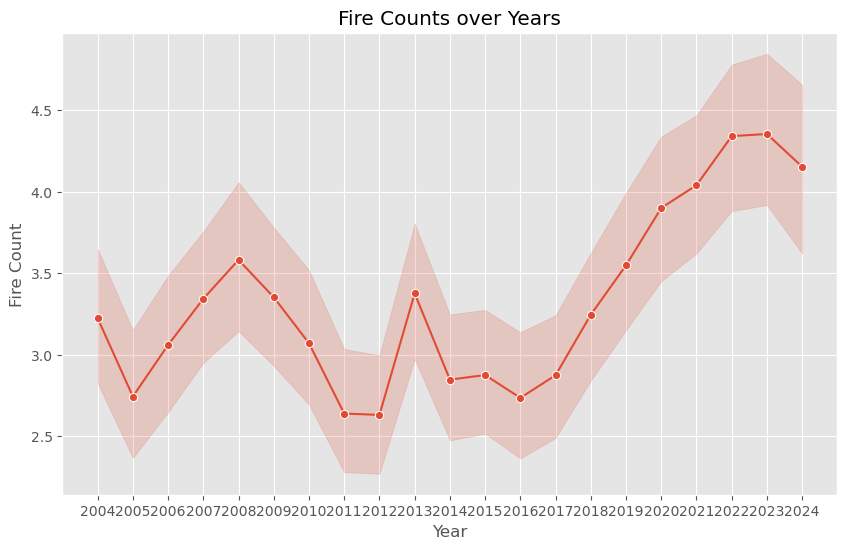

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=final_merge_fire_data_2004_2024, x='year', y='fireCount', marker='o')

# Customize the plot
plt.title('Fire Counts over Years')
plt.xlabel('Year')
plt.ylabel('Fire Count')
plt.grid(True)
plt.xticks(final_merge_fire_data_2004_2024['year'].unique())
# Save the plot
plt.savefig('FIRMS_Fire_counts_over_years.png', dpi=300)

# Show the plot
plt.show()

## Reading ACLED DATA CSV file for the year 2004-2024

In [59]:
# acled_data_2004_2024 = pd.read_csv("data/2004-01-01-2024-06-30-Sudan.csv", encoding = "latin1")

In [60]:
# acled_data_2004_2024

In [61]:
# acled_df = acled_data_2004_2024[acled_data_2004_2024['sub_event_type'] != 'Arrests']

In [62]:
# acled_df

In [63]:
# print(acled_df.shape)

In [64]:
# acled_df.info()

**Counting NULLS by Columns**

In [65]:
# acled_df.isnull().sum(axis=0).sort_values(ascending=False)[:12]

Now we can remove admin3 and tags as it has no important information and has highest null values.

In [66]:
# acled_df.drop(columns=['admin3', 'tags'], inplace=True)

In [67]:
# acled_df.columns

In [68]:
# acled_gdf = gpd.GeoDataFrame(acled_df, geometry=gpd.points_from_xy(acled_df.longitude, acled_df.latitude))

In [69]:
# acled_gdf.head()

In [70]:
# from shapely.geometry import Point, box

In [71]:
# # Load the Sudan boundary
# sudan_gdf = gpd.read_file('data/gadm41_SDN.gpkg')

# # Create a function to generate the grid
# def create_grid(bbox, grid_size):
#     xmin, ymin, xmax, ymax = bbox
#     cols = np.arange(xmin, xmax, grid_size)
#     rows = np.arange(ymin, ymax, grid_size)
#     polygons = []
#     for x in cols:
#         for y in rows:
#             polygons.append(box(x, y, x + grid_size, y + grid_size))
#     return gpd.GeoDataFrame({'geometry': polygons})

# # Create the grid
# sudan_bbox = sudan_gdf.total_bounds
# grid_gdf = create_grid(sudan_bbox, grid_size)

# # Filter the grid cells that intersect with Sudan
# grid_gdf = gpd.overlay(grid_gdf, sudan_gdf, how='intersection')


In [72]:
# # Spatial join to count events in each grid cell
# join_gdf = gpd.sjoin(grid_gdf, acled_gdf, how="left", op="contains")

# # Check the join_gdf columns to debug
# print(join_gdf.columns)

# # Check for the 'index_left' column in the joined GeoDataFrame
# if 'index_left' in join_gdf.columns:
#     # Count the events per grid cell
#     event_counts = join_gdf.groupby('index_left').size()

#     # Add event counts to the grid GeoDataFrame
#     grid_gdf['event_count'] = event_counts.values

#     # Replace NaN values with 0 (for grid cells with no events)
#     grid_gdf['event_count'] = grid_gdf['event_count'].fillna(0)
# else:
#     print("The 'index_left' column is not present in the joined GeoDataFrame. Check the spatial join operation.")

# # Print the result
# print(grid_gdf)

# # Save the result to a CSV file
# grid_gdf.to_csv('sudan_acled_counts_grid_2022.csv')

## loading the ACLED_with_Grid_Count from Google Earth Engine

In [73]:
acled_grid_2004 = pd.read_csv("data/ACLED_2004_Counts_year.csv", encoding = "latin1")

In [74]:
acled_grid_2005 = pd.read_csv("data/ACLED_2005_Counts.csv", encoding = "latin1")

In [75]:
acled_grid_2006 = pd.read_csv("data/ACLED_2006_Counts_.csv", encoding = "latin1")

In [76]:
acled_grid_2007 = pd.read_csv("data/ACLED_2007_Counts_.csv", encoding = "latin1")

In [77]:
acled_grid_2008 = pd.read_csv("data/ACLED_2008_Counts_.csv", encoding = "latin1")

In [78]:
acled_grid_2009 = pd.read_csv("data/ACLED_2009_Counts_.csv", encoding = "latin1")

In [79]:
acled_grid_2010 = pd.read_csv("data/ACLED_2010_Counts_.csv", encoding = "latin1")

In [80]:
acled_grid_2011 = pd.read_csv("data/ACLED_2011_Counts_.csv", encoding = "latin1")

In [81]:
acled_grid_2012 = pd.read_csv("data/ACLED_2012_Counts_.csv", encoding = "latin1")

In [82]:
acled_grid_2013 = pd.read_csv("data/ACLED_2013_Counts_.csv", encoding = "latin1")

In [83]:
acled_grid_2014 = pd.read_csv("data/ACLED_2014_Counts_.csv", encoding = "latin1")

In [84]:
acled_grid_2015 = pd.read_csv("data/ACLED_2015_Counts_.csv", encoding = "latin1")

In [85]:
acled_grid_2016 = pd.read_csv("data/ACLED_2016_Counts_.csv", encoding = "latin1")

In [86]:
acled_grid_2017 = pd.read_csv("data/ACLED_2017_Counts_.csv", encoding = "latin1")
acled_grid_2018 = pd.read_csv("data/ACLED_2018_Counts_.csv", encoding = "latin1")
acled_grid_2019 = pd.read_csv("data/ACLED_2019_Counts_.csv", encoding = "latin1")
acled_grid_2020 = pd.read_csv("data/ACLED_2020_Counts_.csv", encoding = "latin1")
acled_grid_2021 = pd.read_csv("data/ACLED_2021_Counts_.csv", encoding = "latin1")
acled_grid_2022 = pd.read_csv("data/ACLED_2022_Counts_.csv", encoding = "latin1")
acled_grid_2023 = pd.read_csv("data/ACLED_2023_Counts_.csv", encoding = "latin1")

In [87]:
acled_grid_2024 = pd.read_csv("data/ACLED_2024_Counts_.csv", encoding = "latin1")

In [88]:
acled_2004_2024 = pd.concat([acled_grid_2004, acled_grid_2005, acled_grid_2006, acled_grid_2007, acled_grid_2008, acled_grid_2009, acled_grid_2010, acled_grid_2011, acled_grid_2012, acled_grid_2013, acled_grid_2014, acled_grid_2015, acled_grid_2016, acled_grid_2017, acled_grid_2018, acled_grid_2019, acled_grid_2020, acled_grid_2021, acled_grid_2022, acled_grid_2023, acled_grid_2024], ignore_index = True)

In [89]:
acled_2004_2024.shape

(17850, 5)

In [91]:
acled_grid_2024.describe(include='all')

,system:index,acled_count,grid_id,year,.geo
count,850,850.0000,850,850.0000,850
unique,850,NaN,850,NaN,850
top,"52,19",NaN,"52,19",NaN,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
freq,1,NaN,1,NaN,1
mean,NaN,6.7788,NaN,"2,024.0000",NaN
std,NaN,77.0482,NaN,0.0000,NaN
min,NaN,0.0000,NaN,"2,024.0000",NaN
25%,NaN,0.0000,NaN,"2,024.0000",NaN
50%,NaN,0.0000,NaN,"2,024.0000",NaN
75%,NaN,0.0000,NaN,"2,024.0000",NaN


In [92]:
# Sort by year and grid_id
acled_2004_2024 = acled_2004_2024.sort_values(['year', 'grid_id'])

# Reset the index
acled_2004_2024 = acled_2004_2024.reset_index(drop=True)

# View the first few rows
print(acled_2004_2024.head())

# Save to a new CSV file
acled_2004_2024.to_csv('acled_grid_2004_2024_combined.csv', index=False)

  system:index  acled_count grid_id  year  \
0        48,28            0   48,28  2004   
1        48,29            2   48,29  2004   
2        49,27            0   49,27  2004   
3        49,28            0   49,28  2004   
4        49,29           50   49,29  2004   

                                                .geo  
0  {"geodesic":false,"crs":{"type":"name","proper...  
1  {"geodesic":false,"crs":{"type":"name","proper...  
2  {"geodesic":false,"crs":{"type":"name","proper...  
3  {"geodesic":false,"crs":{"type":"name","proper...  
4  {"geodesic":false,"crs":{"type":"name","proper...  


In [93]:
#acled_2004_2024

In [94]:
#final_merge_fire_data_2004_2024

## Data Analysis of ACLED AND FIRMS

In [95]:
acled_2004_2024['grid_id']

0        48,28
1        48,29
2        49,27
3        49,28
4        49,29
         ...  
17845    84,41
17846    84,42
17847    85,39
17848    85,40
17849    85,41
Name: grid_id, Length: 17850, dtype: object

In [96]:
acled_2004_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17850 entries, 0 to 17849
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system:index  17850 non-null  object
 1   acled_count   17850 non-null  int64 
 2   grid_id       17850 non-null  object
 3   year          17850 non-null  int64 
 4   .geo          17850 non-null  object
dtypes: int64(2), object(3)
memory usage: 697.4+ KB


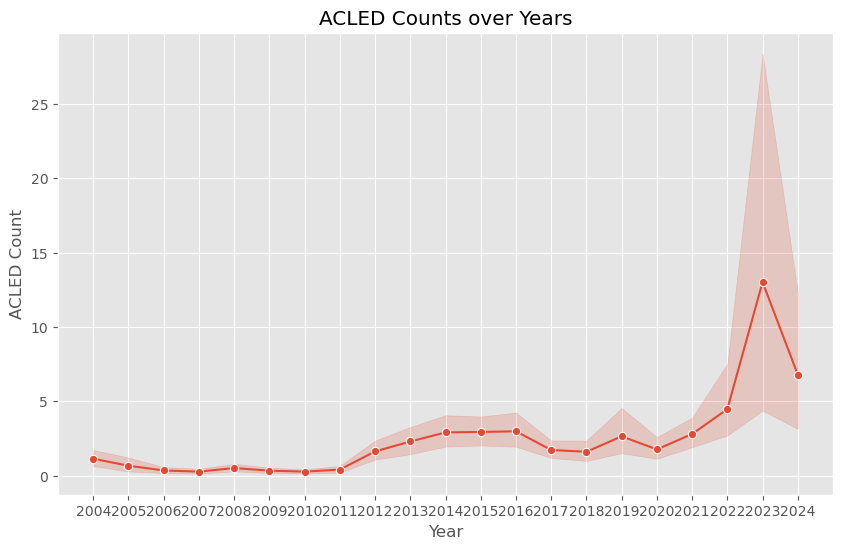

In [97]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=acled_2004_2024, x='year', y='acled_count', marker='o')

# Customize the plot
plt.title('ACLED Counts over Years')
plt.xlabel('Year')
plt.ylabel('ACLED Count')
plt.grid(True)
plt.xticks(acled_2004_2024['year'].unique())
# Save the plot
plt.savefig('ACLED_Conflicts.png', dpi=300)

# Show the plot
plt.show()

**For our Analysis we need to join ACLED dataset and FIRMS Fire data to make a Panel data with each grid and for every year**

In [98]:
# Merge the DataFrames
merged_df = pd.merge(acled_2004_2024, final_merge_fire_data_2004_2024, on=['grid_id', 'year'], how='outer')

In [99]:
merged_df

,system:index_x,acled_count,grid_id,year,.geo_x,system:index_y,fireCount,.geo_y
0,"48,28",0,"48,28",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",555,9,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"48,29",2,"48,29",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",654,4,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"49,27",0,"49,27",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",462,7,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"49,28",0,"49,28",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",558,12,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"49,29",50,"49,29",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",657,10,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...,...,...
17845,"84,41",0,"84,41",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",1271,2,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17846,"84,42",0,"84,42",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",1337,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17847,"85,39",0,"85,39",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",1141,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17848,"85,40",0,"85,40",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",1207,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [100]:
# Rename the '.geo' columns
merged_df = merged_df.rename(columns={'.geo_x': 'geo_acled', '.geo_y': 'geo_fire'})

In [101]:
merged_df 

,system:index_x,acled_count,grid_id,year,geo_acled,system:index_y,fireCount,geo_fire
0,"48,28",0,"48,28",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",555,9,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"48,29",2,"48,29",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",654,4,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"49,27",0,"49,27",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",462,7,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"49,28",0,"49,28",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",558,12,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"49,29",50,"49,29",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",657,10,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...,...,...
17845,"84,41",0,"84,41",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",1271,2,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17846,"84,42",0,"84,42",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",1337,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17847,"85,39",0,"85,39",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",1141,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17848,"85,40",0,"85,40",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",1207,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [102]:
merged_df.shape

(17850, 8)

_The combined dataset has 17850 rows and 8 columns._

In [103]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17850 entries, 0 to 17849
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   system:index_x  17850 non-null  object
 1   acled_count     17850 non-null  int64 
 2   grid_id         17850 non-null  object
 3   year            17850 non-null  int64 
 4   geo_acled       17850 non-null  object
 5   system:index_y  17850 non-null  int64 
 6   fireCount       17850 non-null  int64 
 7   geo_fire        17850 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.1+ MB


In [104]:
#Counting Null values by Column
merged_df.isnull().sum(axis=0).sort_values(ascending=False)[:12]

system:index_x    0
acled_count       0
grid_id           0
year              0
geo_acled         0
system:index_y    0
fireCount         0
geo_fire          0
dtype: int64

In [105]:
#Counting Null values by Rows
merged_df.isnull().sum(axis=1).sort_values(ascending=False).head(20)

0        0
11897    0
11903    0
11902    0
11901    0
11900    0
11899    0
11898    0
11896    0
11888    0
11895    0
11894    0
11893    0
11892    0
11891    0
11890    0
11904    0
11905    0
11906    0
11907    0
dtype: int64

_There are No NULL Values_

In [106]:
# Fill NaN values
merged_df['acled_count'] = merged_df['acled_count'].fillna(0)
merged_df['fireCount'] = merged_df['fireCount'].fillna(0)

In [107]:
merged_df = merged_df.drop(columns=['system:index_x', 'system:index_y'])

In [108]:
# Rearrange columns
new_column_order = [
    'grid_id',
    'year',
    'fireCount',
    'acled_count',
    'geo_acled',
    'geo_fire'
]

# Reorder the columns
merged_df = merged_df[new_column_order]

In [109]:
# Sort the DataFrame
merged_df = merged_df.sort_values(['year', 'grid_id'])

# Reset the index
merged_df = merged_df.reset_index(drop=True)

# View the first few rows
#print(merged_df.head())

# Save to a new CSV file
merged_df.to_csv('acled_fire_combined_2004_2024.csv', index=False)

In [110]:
#combined dataframe for Fire count and ACLED with GridID and Year
merged_df

,grid_id,year,fireCount,acled_count,geo_acled,geo_fire
0,"48,28",2004,9,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"48,29",2004,4,2,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"49,27",2004,7,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"49,28",2004,12,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"49,29",2004,10,50,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...
17845,"84,41",2024,2,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17846,"84,42",2024,0,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17847,"85,39",2024,0,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17848,"85,40",2024,0,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


**Data Cleaning of Merged dataframe**

In [111]:
merged_df.columns

Index(['grid_id', 'year', 'fireCount', 'acled_count', 'geo_acled', 'geo_fire'], dtype='object')

**Creating a Geodataframe**

In [112]:
import json
from shapely.geometry import shape

# Assuming your data is in a DataFrame called 'merged_df'

def parse_geometry(geo_string):
    try:
        geo_dict = json.loads(geo_string)
        return shape(geo_dict)
    except:
        return None

# Convert both 'geo_fire' and 'geo_acled' columns to Shapely geometries
merged_df['geometry_fire'] = merged_df['geo_fire'].apply(parse_geometry)
merged_df['geometry_acled'] = merged_df['geo_acled'].apply(parse_geometry)

# Create two GeoDataFrames
gdf_fire = gpd.GeoDataFrame(merged_df, geometry='geometry_fire')
gdf_acled = gpd.GeoDataFrame(merged_df, geometry='geometry_acled')

# Set the CRS (Coordinate Reference System) if known
# For example, if it's WGS84:
gdf_fire.set_crs(epsg=4326, inplace=True)
gdf_acled.set_crs(epsg=4326, inplace=True)

# Now you have two GeoDataFrames with proper geometry columns
print("GeoDataFrame with fire geometries:")
print(gdf_fire.head())
print("\nGeoDataFrame with ACLED geometries:")
print(gdf_acled.head())

GeoDataFrame with fire geometries:
  grid_id  year  fireCount  acled_count  \
0   48,28  2004          9            0   
1   48,29  2004          4            2   
2   49,27  2004          7            0   
3   49,28  2004         12            0   
4   49,29  2004         10           50   

                                           geo_acled  \
0  {"geodesic":false,"crs":{"type":"name","proper...   
1  {"geodesic":false,"crs":{"type":"name","proper...   
2  {"geodesic":false,"crs":{"type":"name","proper...   
3  {"geodesic":false,"crs":{"type":"name","proper...   
4  {"geodesic":false,"crs":{"type":"name","proper...   

                                            geo_fire  \
0  {"geodesic":false,"crs":{"type":"name","proper...   
1  {"geodesic":false,"crs":{"type":"name","proper...   
2  {"geodesic":false,"crs":{"type":"name","proper...   
3  {"geodesic":false,"crs":{"type":"name","proper...   
4  {"geodesic":false,"crs":{"type":"name","proper...   

                                

In [113]:
merged_df

,grid_id,year,fireCount,acled_count,geo_acled,geo_fire,geometry_fire,geometry_acled
0,"48,28",2004,9,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((21.559566818868515 12.57641397767330...,POLYGON ((21.559566818868515 12.57641397767330...
1,"48,29",2004,4,2,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((21.559566818868515 13.02557161973306...,POLYGON ((21.559566818868515 13.02557161973306...
2,"49,27",2004,7,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((22.008724460928274 12.12725633561354...,POLYGON ((22.008724460928274 12.12725633561354...
3,"49,28",2004,12,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((22.008724460928274 12.57641397767330...,POLYGON ((22.008724460928274 12.57641397767330...
4,"49,29",2004,10,50,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((22.008724460928274 13.02557161973306...,POLYGON ((22.008724460928274 13.02557161973306...
...,...,...,...,...,...,...,...,...
17845,"84,41",2024,2,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...","POLYGON ((37.7292419330199 18.41546332445019, ...","POLYGON ((37.7292419330199 18.41546332445019, ..."
17846,"84,42",2024,0,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...","POLYGON ((37.7292419330199 18.86462096650995, ...","POLYGON ((37.7292419330199 18.86462096650995, ..."
17847,"85,39",2024,0,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((38.17839957507966 17.517148040330667...,POLYGON ((38.17839957507966 17.517148040330667...
17848,"85,40",2024,0,0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((38.17839957507966 17.966305682390427...,POLYGON ((38.17839957507966 17.966305682390427...


**Drop geo_acled and geo_fire column**

In [114]:
merged_df = merged_df.drop(columns=['geo_acled', 'geo_fire'])

In [115]:
merged_df

,grid_id,year,fireCount,acled_count,geometry_fire,geometry_acled
0,"48,28",2004,9,0,POLYGON ((21.559566818868515 12.57641397767330...,POLYGON ((21.559566818868515 12.57641397767330...
1,"48,29",2004,4,2,POLYGON ((21.559566818868515 13.02557161973306...,POLYGON ((21.559566818868515 13.02557161973306...
2,"49,27",2004,7,0,POLYGON ((22.008724460928274 12.12725633561354...,POLYGON ((22.008724460928274 12.12725633561354...
3,"49,28",2004,12,0,POLYGON ((22.008724460928274 12.57641397767330...,POLYGON ((22.008724460928274 12.57641397767330...
4,"49,29",2004,10,50,POLYGON ((22.008724460928274 13.02557161973306...,POLYGON ((22.008724460928274 13.02557161973306...
...,...,...,...,...,...,...
17845,"84,41",2024,2,0,"POLYGON ((37.7292419330199 18.41546332445019, ...","POLYGON ((37.7292419330199 18.41546332445019, ..."
17846,"84,42",2024,0,0,"POLYGON ((37.7292419330199 18.86462096650995, ...","POLYGON ((37.7292419330199 18.86462096650995, ..."
17847,"85,39",2024,0,0,POLYGON ((38.17839957507966 17.517148040330667...,POLYGON ((38.17839957507966 17.517148040330667...
17848,"85,40",2024,0,0,POLYGON ((38.17839957507966 17.966305682390427...,POLYGON ((38.17839957507966 17.966305682390427...


In [116]:
# Create a single GeoDataFrame with both geometries
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry_fire')
gdf['geometry_acled'] = gdf_acled.geometry
gdf.set_crs(epsg=4326, inplace=True)

print("GeoDataFrame with both geometries:")
print(gdf.head())

GeoDataFrame with both geometries:
  grid_id  year  fireCount  acled_count  \
0   48,28  2004          9            0   
1   48,29  2004          4            2   
2   49,27  2004          7            0   
3   49,28  2004         12            0   
4   49,29  2004         10           50   

                                       geometry_fire  \
0  POLYGON ((21.55957 12.57641, 22.00872 12.57641...   
1  POLYGON ((21.55957 13.02557, 22.00872 13.02557...   
2  POLYGON ((22.00872 12.12726, 22.45788 12.12726...   
3  POLYGON ((22.00872 12.57641, 22.45788 12.57641...   
4  POLYGON ((22.00872 13.02557, 22.45788 13.02557...   

                                      geometry_acled  
0  POLYGON ((21.55957 12.57641, 22.00872 12.57641...  
1  POLYGON ((21.55957 13.02557, 22.00872 13.02557...  
2  POLYGON ((22.00872 12.12726, 22.45788 12.12726...  
3  POLYGON ((22.00872 12.57641, 22.45788 12.57641...  
4  POLYGON ((22.00872 13.02557, 22.45788 13.02557...  


**we can drop one geometry as both are same co-ordinates**

In [117]:
merged_df = merged_df.drop(columns=['geometry_acled'])

In [118]:
merged_df

,grid_id,year,fireCount,acled_count,geometry_fire
0,"48,28",2004,9,0,POLYGON ((21.559566818868515 12.57641397767330...
1,"48,29",2004,4,2,POLYGON ((21.559566818868515 13.02557161973306...
2,"49,27",2004,7,0,POLYGON ((22.008724460928274 12.12725633561354...
3,"49,28",2004,12,0,POLYGON ((22.008724460928274 12.57641397767330...
4,"49,29",2004,10,50,POLYGON ((22.008724460928274 13.02557161973306...
...,...,...,...,...,...
17845,"84,41",2024,2,0,"POLYGON ((37.7292419330199 18.41546332445019, ..."
17846,"84,42",2024,0,0,"POLYGON ((37.7292419330199 18.86462096650995, ..."
17847,"85,39",2024,0,0,POLYGON ((38.17839957507966 17.517148040330667...
17848,"85,40",2024,0,0,POLYGON ((38.17839957507966 17.966305682390427...


**so now we got a Geodataframe- gdf**

In [119]:
gdf

,grid_id,year,fireCount,acled_count,geometry_fire,geometry_acled
0,"48,28",2004,9,0,"POLYGON ((21.55957 12.57641, 22.00872 12.57641...","POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
1,"48,29",2004,4,2,"POLYGON ((21.55957 13.02557, 22.00872 13.02557...","POLYGON ((21.55957 13.02557, 22.00872 13.02557..."
2,"49,27",2004,7,0,"POLYGON ((22.00872 12.12726, 22.45788 12.12726...","POLYGON ((22.00872 12.12726, 22.45788 12.12726..."
3,"49,28",2004,12,0,"POLYGON ((22.00872 12.57641, 22.45788 12.57641...","POLYGON ((22.00872 12.57641, 22.45788 12.57641..."
4,"49,29",2004,10,50,"POLYGON ((22.00872 13.02557, 22.45788 13.02557...","POLYGON ((22.00872 13.02557, 22.45788 13.02557..."
...,...,...,...,...,...,...
17845,"84,41",2024,2,0,"POLYGON ((37.72924 18.41546, 38.17840 18.41546...","POLYGON ((37.72924 18.41546, 38.17840 18.41546..."
17846,"84,42",2024,0,0,"POLYGON ((37.72924 18.86462, 38.17840 18.86462...","POLYGON ((37.72924 18.86462, 38.17840 18.86462..."
17847,"85,39",2024,0,0,"POLYGON ((38.17840 17.51715, 38.62756 17.51715...","POLYGON ((38.17840 17.51715, 38.62756 17.51715..."
17848,"85,40",2024,0,0,"POLYGON ((38.17840 17.96631, 38.62756 17.96631...","POLYGON ((38.17840 17.96631, 38.62756 17.96631..."


In [120]:
gdf= gdf.drop(columns=['geometry_acled'])

In [121]:
gdf

,grid_id,year,fireCount,acled_count,geometry_fire
0,"48,28",2004,9,0,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
1,"48,29",2004,4,2,"POLYGON ((21.55957 13.02557, 22.00872 13.02557..."
2,"49,27",2004,7,0,"POLYGON ((22.00872 12.12726, 22.45788 12.12726..."
3,"49,28",2004,12,0,"POLYGON ((22.00872 12.57641, 22.45788 12.57641..."
4,"49,29",2004,10,50,"POLYGON ((22.00872 13.02557, 22.45788 13.02557..."
...,...,...,...,...,...
17845,"84,41",2024,2,0,"POLYGON ((37.72924 18.41546, 38.17840 18.41546..."
17846,"84,42",2024,0,0,"POLYGON ((37.72924 18.86462, 38.17840 18.86462..."
17847,"85,39",2024,0,0,"POLYGON ((38.17840 17.51715, 38.62756 17.51715..."
17848,"85,40",2024,0,0,"POLYGON ((38.17840 17.96631, 38.62756 17.96631..."


In [122]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17850 entries, 0 to 17849
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   grid_id        17850 non-null  object  
 1   year           17850 non-null  int64   
 2   fireCount      17850 non-null  int64   
 3   acled_count    17850 non-null  int64   
 4   geometry_fire  17850 non-null  geometry
dtypes: geometry(1), int64(3), object(1)
memory usage: 697.4+ KB


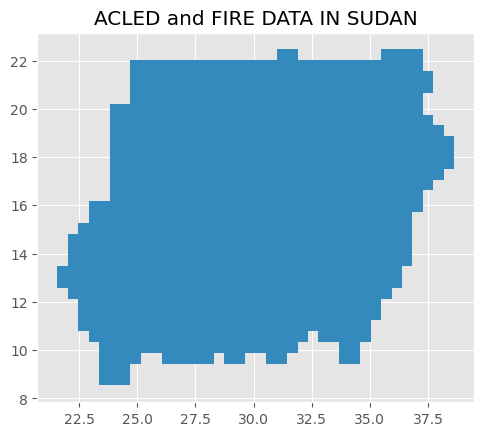

In [123]:
#Plotting the data
gdf.plot()
plt.title('ACLED and FIRE DATA IN SUDAN')
plt.show()

In [124]:
# Assuming 'gdf' is your GeoDataFrame
gdf.to_file('firms_acled_gdf.shp')

In [125]:
gdf.to_file('firms_acled_gdf.geojson', driver='GeoJSON')

In [126]:
print(gdf.crs)
print(gdf.geometry_fire.head())

EPSG:4326
0    POLYGON ((21.55957 12.57641, 22.00872 12.57641...
1    POLYGON ((21.55957 13.02557, 22.00872 13.02557...
2    POLYGON ((22.00872 12.12726, 22.45788 12.12726...
3    POLYGON ((22.00872 12.57641, 22.45788 12.57641...
4    POLYGON ((22.00872 13.02557, 22.45788 13.02557...
Name: geometry_fire, dtype: geometry


In [127]:
gdf['geometry_fire'] = gdf['geometry_fire'].buffer(0)

In [186]:
if gdf.empty:
    print("The GeoDataFrame is empty. Please check your data.")
else:
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    # Plot the fire counts
    gdf.plot(column='fireCount', 
             ax=ax, 
             legend=True, 
             legend_kwds={'label': 'Fire Count', 'orientation': 'horizontal'},
             cmap='YlOrRd',
             missing_kwds={'color': 'lightgrey'},
             edgecolor='black',
             linewidth=0.5)

    # Add a title
    plt.title('Fire Counts by Grid', fontsize=16)

    # Remove axes
    ax.axis('off')

    # Set the extent of the plot to the bounds of the data
    ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
    ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('fire_counts_map.png', dpi=300, bbox_inches='tight')
    plt.close()
    

    print("Fire counts map saved as 'fire_counts_map.png'")
    plt.show()

# Print some information about the GeoDataFrame
print(f"Number of rows: {len(gdf)}")
print(f"Columns: {gdf.columns}")
print(f"CRS: {gdf.crs}")
print(f"Geometry type: {gdf.geometry_fire.geom_type.value_counts()}")
print(f"Bounding box: {gdf.total_bounds}")

Fire counts map saved as 'fire_counts_map.png'
Number of rows: 17850
Columns: Index(['grid_id', 'year', 'fireCount', 'acled_count', 'geometry_fire',
       'constant'],
      dtype='object')
CRS: EPSG:4326
Geometry type: Polygon    17850
Name: count, dtype: int64
Bounding box: [21.55956682  8.5339952  38.62755722 22.4578821 ]


ACLED counts map saved as 'acled_counts_map.png'


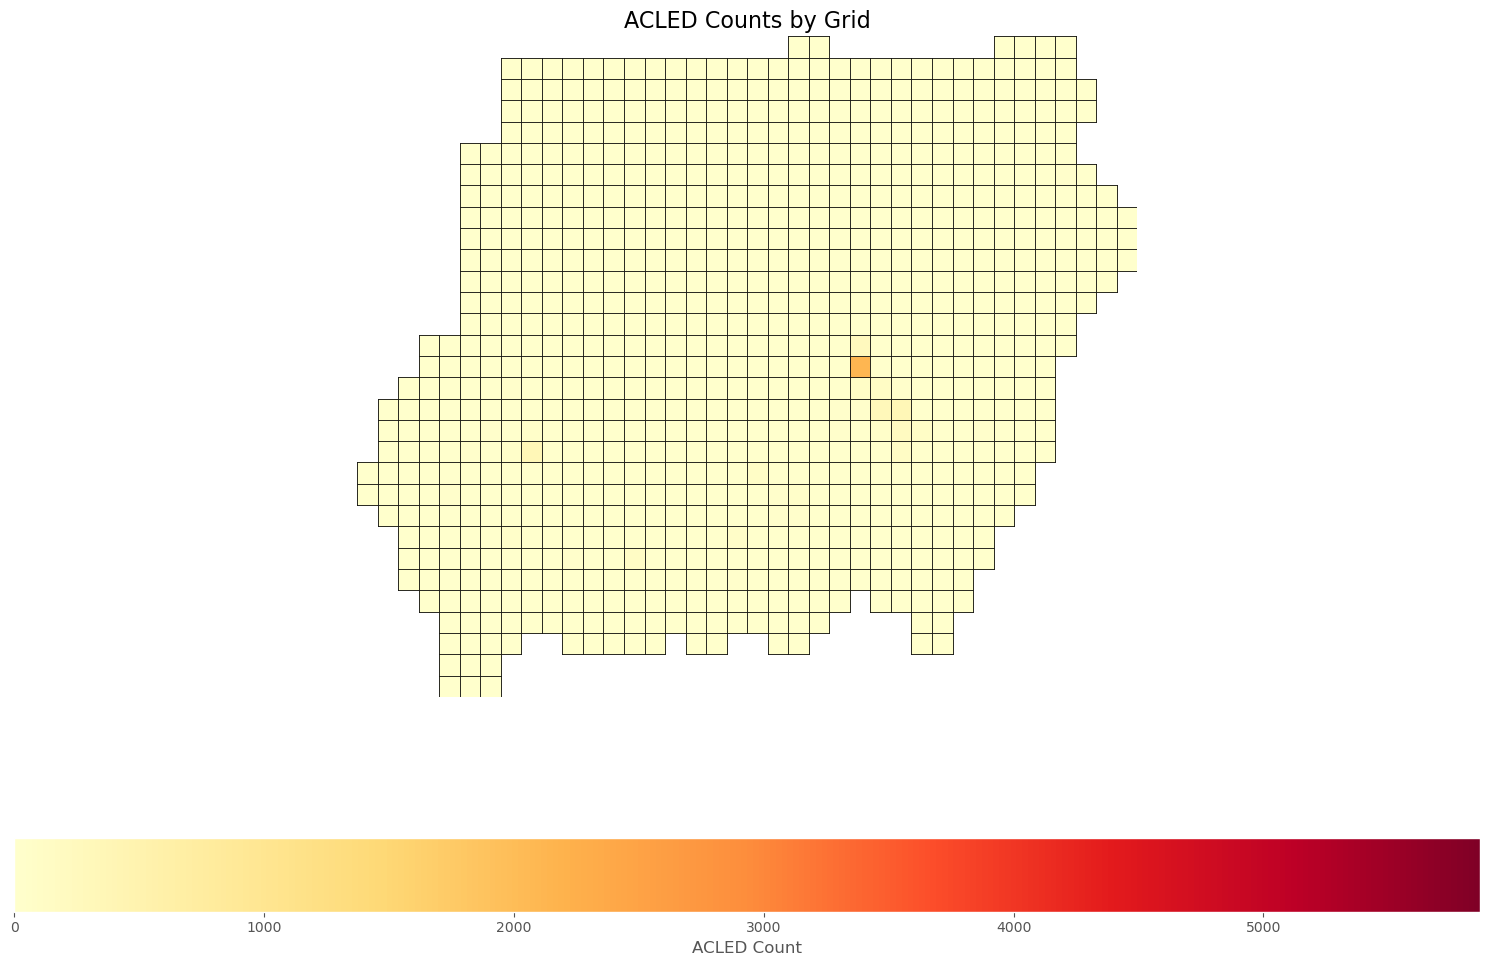

Number of rows: 17850
Columns: Index(['grid_id', 'year', 'fireCount', 'acled_count', 'geometry_fire'], dtype='object')
CRS: EPSG:4326
Geometry type: Polygon    17850
Name: count, dtype: int64
Bounding box: [21.55956682  8.5339952  38.62755722 22.4578821 ]
ACLED count range: 0 to 5867


In [129]:
# Check if the GeoDataFrame is empty
if gdf.empty:
    print("The GeoDataFrame is empty. Please check your data.")
else:
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    # Plot the ACLED counts
    gdf.plot(column='acled_count', 
             ax=ax, 
             legend=True, 
             legend_kwds={'label': 'ACLED Count', 'orientation': 'horizontal'},
             cmap='YlOrRd',  # You can change this to another colormap if you prefer
             missing_kwds={'color': 'lightgrey'},
             edgecolor='black',
             linewidth=0.5)

    # Add a title
    plt.title('ACLED Counts by Grid', fontsize=16)

    # Remove axes
    ax.axis('off')

    # Set the extent of the plot to the bounds of the data
    ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
    ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('acled_counts_map.png', dpi=300, bbox_inches='tight')
    
    print("ACLED counts map saved as 'acled_counts_map.png'")

    # Display the plot (optional - remove if you don't want to display it)
    plt.show()

# Print some information about the GeoDataFrame
print(f"Number of rows: {len(gdf)}")
print(f"Columns: {gdf.columns}")
print(f"CRS: {gdf.crs}")
print(f"Geometry type: {gdf.geometry_fire.geom_type.value_counts()}")
print(f"Bounding box: {gdf.total_bounds}")
print(f"ACLED count range: {gdf['acled_count'].min()} to {gdf['acled_count'].max()}")

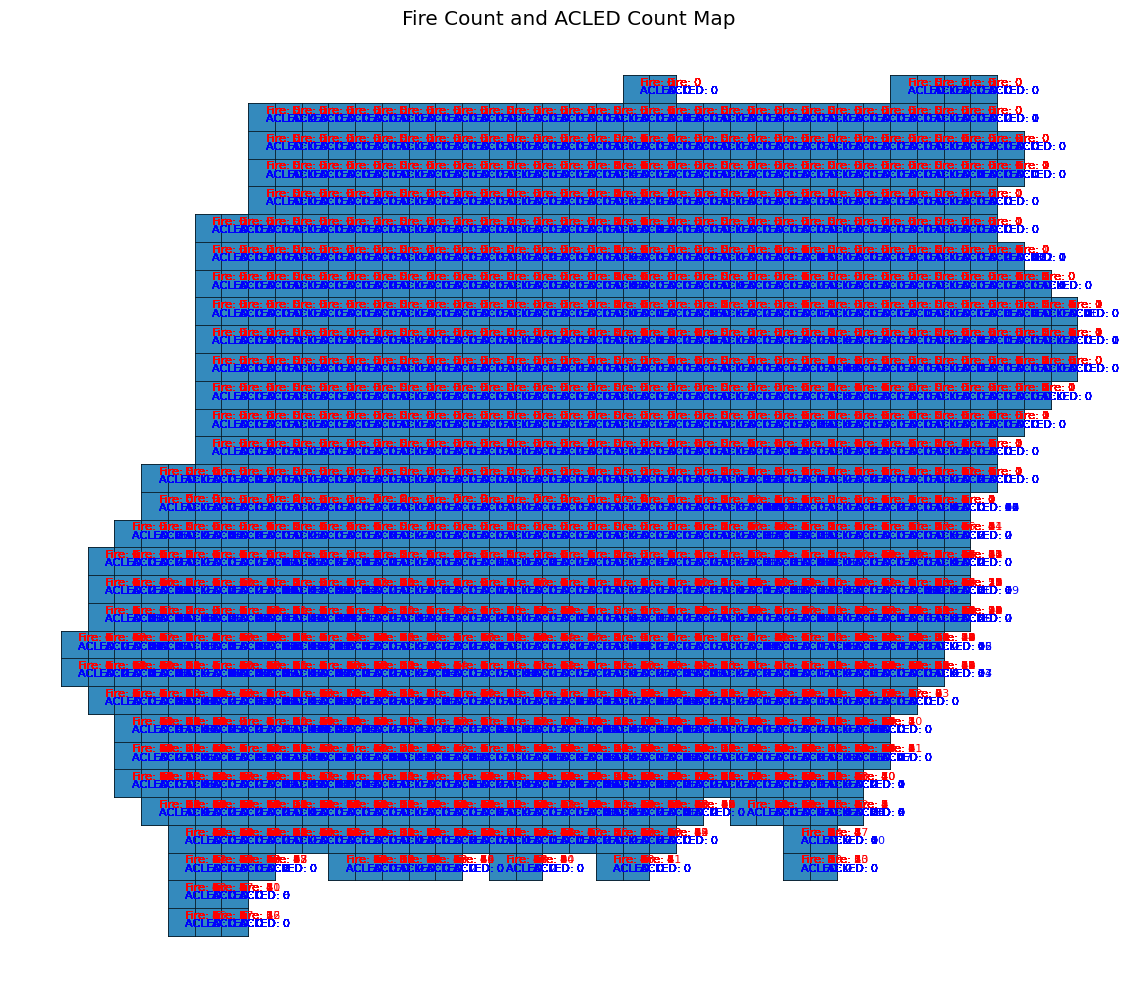

In [130]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the geometries
gdf.plot(ax=ax, edgecolor='black', alpha=0.5)

# Add fire count labels
for idx, row in gdf.iterrows():
    centroid = row['geometry_fire'].centroid
    ax.annotate(f"Fire: {row['fireCount']}", 
                (centroid.x, centroid.y),
                xytext=(3, 3),
                textcoords="offset points",
                fontsize=8,
                color='red')

# Add ACLED count labels
for idx, row in gdf.iterrows():
    centroid = row['geometry_fire'].centroid
    ax.annotate(f"ACLED: {row['acled_count']}", 
                (centroid.x, centroid.y),
                xytext=(3, -3),
                textcoords="offset points",
                fontsize=8,
                color='blue')

# Set the title
plt.title('Fire Count and ACLED Count Map')

# Remove axis labels
ax.set_axis_off()

# Show the plot
plt.tight_layout()
plt.show()

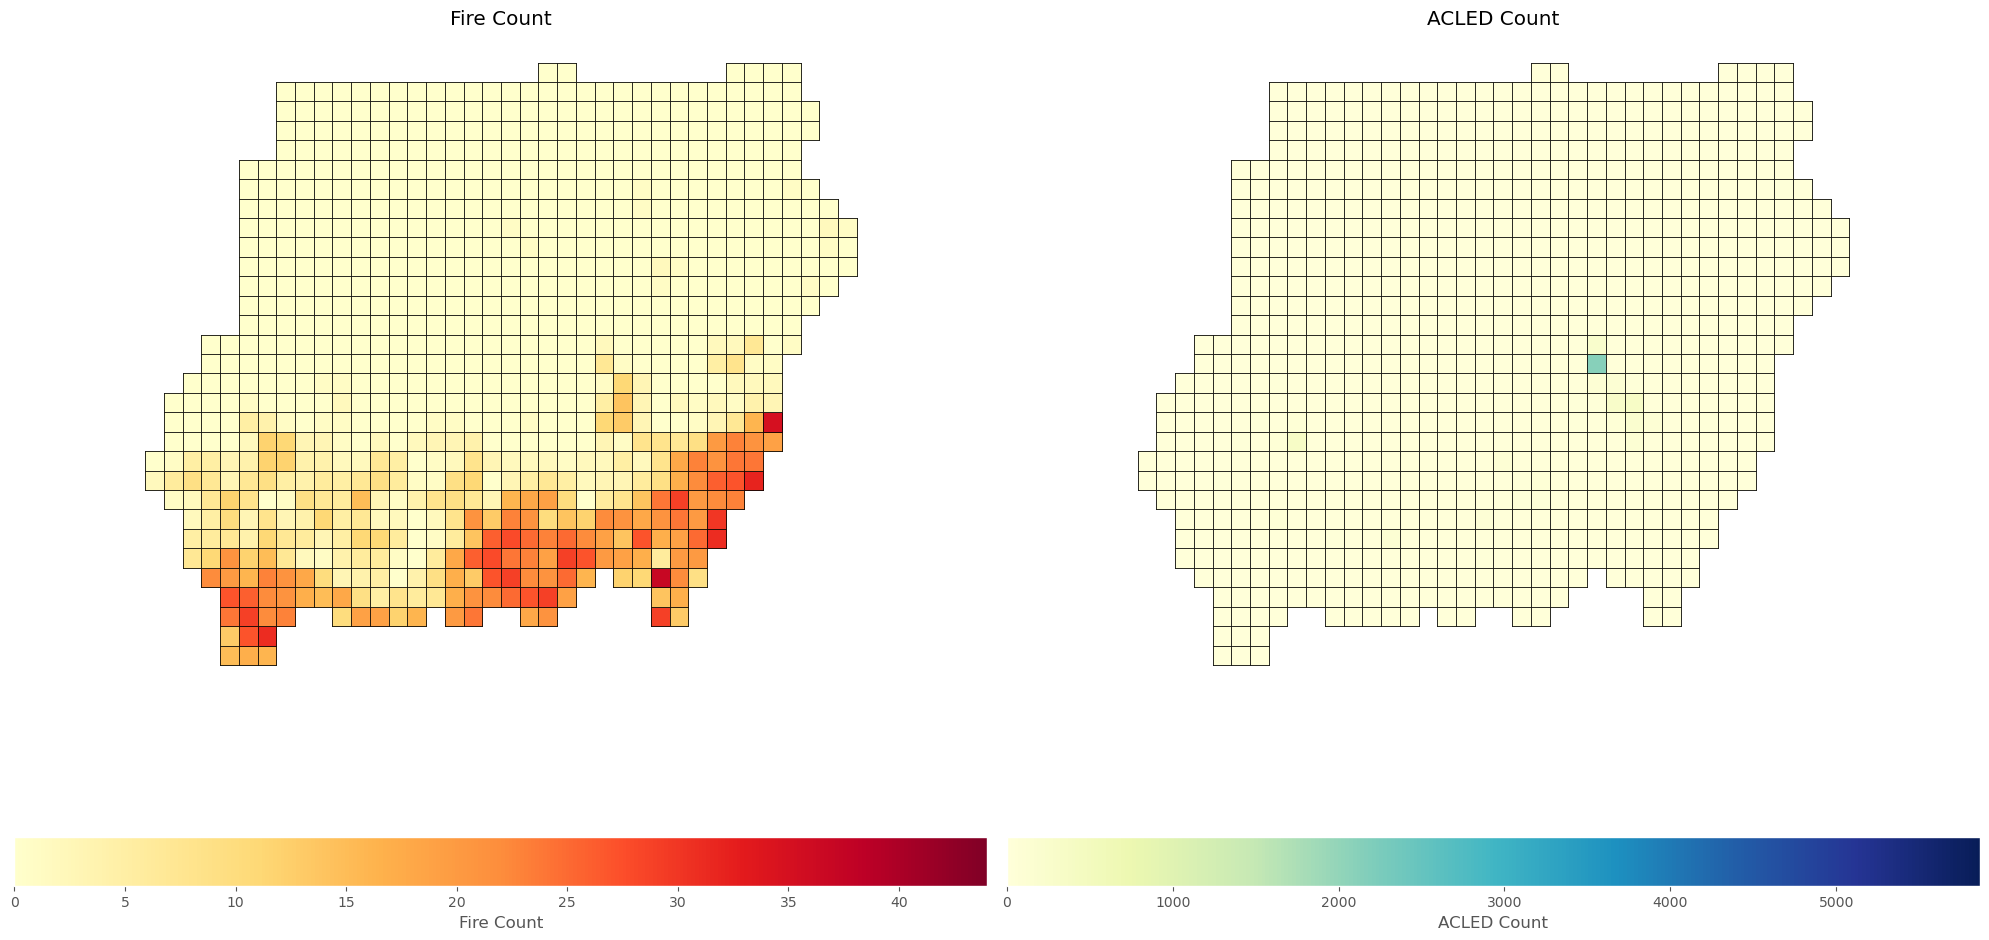

In [131]:
# Create two separate plots for fire_count and acled_count
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot fire_count
gdf.plot(column='fireCount', ax=ax1, legend=True, 
         legend_kwds={'label': 'Fire Count', 'orientation': 'horizontal'},
         cmap='YlOrRd', edgecolor='black', linewidth=0.5)
ax1.set_title('Fire Count')
ax1.axis('off')

# Plot acled_count
gdf.plot(column='acled_count', ax=ax2, legend=True, 
         legend_kwds={'label': 'ACLED Count', 'orientation': 'horizontal'},
         cmap='YlGnBu', edgecolor='black', linewidth=0.5)
ax2.set_title('ACLED Count')
ax2.axis('off')

plt.tight_layout()
plt.show()

In [132]:
gdf.columns

Index(['grid_id', 'year', 'fireCount', 'acled_count', 'geometry_fire'], dtype='object')

In [133]:
import geopandas as gpd
import folium
from branca.colormap import LinearColormap

# Assuming your geodataframe is named 'gdf'

# Convert the GeoDataFrame to WGS84 coordinate system if it's not already
gdf = gdf.to_crs(epsg=4326)

# Calculate the center of the map
center_lat = gdf.geometry_fire.centroid.y.mean()
center_lon = gdf.geometry_fire.centroid.x.mean()

# Create a map
m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Create colormaps
fire_colormap = LinearColormap(colors=['yellow', 'orange', 'red'], vmin=gdf['fireCount'].min(), vmax=gdf['fireCount'].max())
acled_colormap = LinearColormap(colors=['lightblue', 'blue', 'darkblue'], vmin=gdf['acled_count'].min(), vmax=gdf['acled_count'].max())

# Add polygons to the map
for idx, row in gdf.iterrows():
    fire_color = fire_colormap(row['fireCount'])
    acled_color = acled_colormap(row['acled_count'])
    
    folium.GeoJson(
        row['geometry_fire'],
        style_function=lambda x, fire_color=fire_color, acled_color=acled_color: {
            'fillColor': fire_color,
            'color': acled_color,
            'weight': 2,
            'fillOpacity': 0.7
        },
        tooltip=f"Fire Count: {row['fireCount']}, ACLED Count: {row['acled_count']}"
    ).add_to(m)

# Add color scales to the map
fire_colormap.add_to(m)
acled_colormap.add_to(m)

# Save the map
m.save('interactive_map.html')

print("Interactive map saved as 'interactive_map.html'")

Interactive map saved as 'interactive_map.html'


In [134]:
# # Find the grid with maximum fire count
# max_fire_grid = gdf.loc[gdf['fireCount'].idxmax()]

# # Find the grid with maximum ACLED count
# max_acled_grid = gdf.loc[gdf['acled_count'].idxmax()]

# # Print the results
# print("Grid with maximum fire count:")
# print(f"Grid ID: {max_fire_grid.name}")
# print(f"Fire count: {max_fire_grid['fireCount']}")
# print(f"Geometry: {max_fire_grid['geometry_fire']}")
# print("\n")

# print("Grid with maximum ACLED count:")
# print(f"Grid ID: {max_acled_grid.name}")
# print(f"ACLED count: {max_acled_grid['acled_count']}")
# print(f"Geometry: {max_acled_grid['geometry_fire']}")

In [135]:
# # Find top 5 grids with highest fire count
# top_5_fire = gdf.nlargest(5, 'fireCount')

# # Find top 5 grids with highest ACLED count
# top_5_acled = gdf.nlargest(5, 'acled_count')

# print("Top 5 grids with highest fire count:")
# print(top_5_fire[['fireCount', 'geometry_fire']])
# print("\n")

# print("Top 5 grids with highest ACLED count:")
# print(top_5_acled[['acled_count', 'geometry_fire']])

In [136]:
# pip install -- upgrade pip

In [137]:
# pip install geopandas leafmap lonboard -q

In [138]:
# from lonboard import Map, ScatterplotLayer
# import lonboard as lb
# import leafmap

In [139]:
# #Create a map
# m = leafmap.Map(center=[43, -75],zoom=2)

In [140]:
# m.add_gdf(gdf[0:50], layer_name= "fireCount")

In [141]:
#Display the map
# m

In [142]:
merged_df.describe(percentiles=[.05,0.95])

,year,fireCount,acled_count
count,"17,850.0000","17,850.0000","17,850.0000"
mean,"2,014.0000",3.3295,2.4457
std,6.0555,6.2425,49.4211
min,"2,004.0000",0.0000,0.0000
5%,"2,005.0000",0.0000,0.0000
50%,"2,014.0000",0.0000,0.0000
95%,"2,023.0000",18.0000,6.0000
max,"2,024.0000",44.0000,"5,867.0000"


**Checking the Descriptive statistics of all the Numerical Column**

In [143]:
merged_df.fireCount.describe()

count                                17,850.0000
mean                                      3.3295
std                                       6.2425
min                                       0.0000
25%                                       0.0000
50%                                       0.0000
75%                                       4.0000
max                                      44.0000
Name: fireCount, dtype: float64

In [144]:
merged_df.acled_count.describe()

count                                17,850.0000
mean                                      2.4457
std                                      49.4211
min                                       0.0000
25%                                       0.0000
50%                                       0.0000
75%                                       0.0000
max                                   5,867.0000
Name: acled_count, dtype: float64

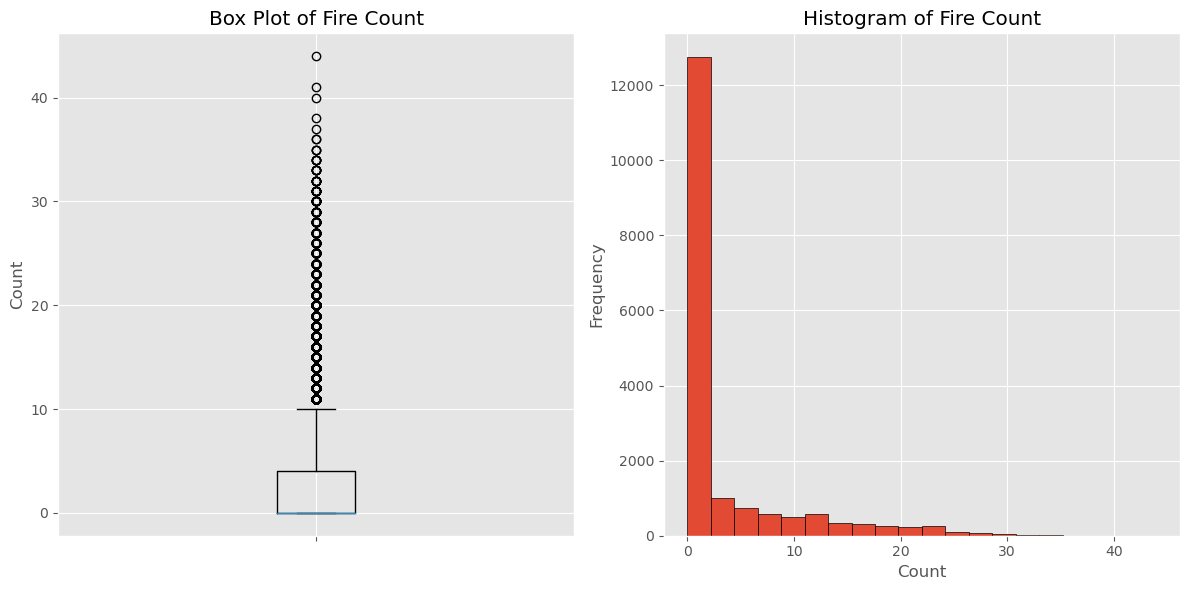

In [145]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot a box plot
axs[0].boxplot(merged_df['fireCount'])
axs[0].set_title('Box Plot of Fire Count')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels([''])

# Plot a histogram
axs[1].hist(merged_df['fireCount'], bins=20, edgecolor='black')
axs[1].set_title('Histogram of Fire Count')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

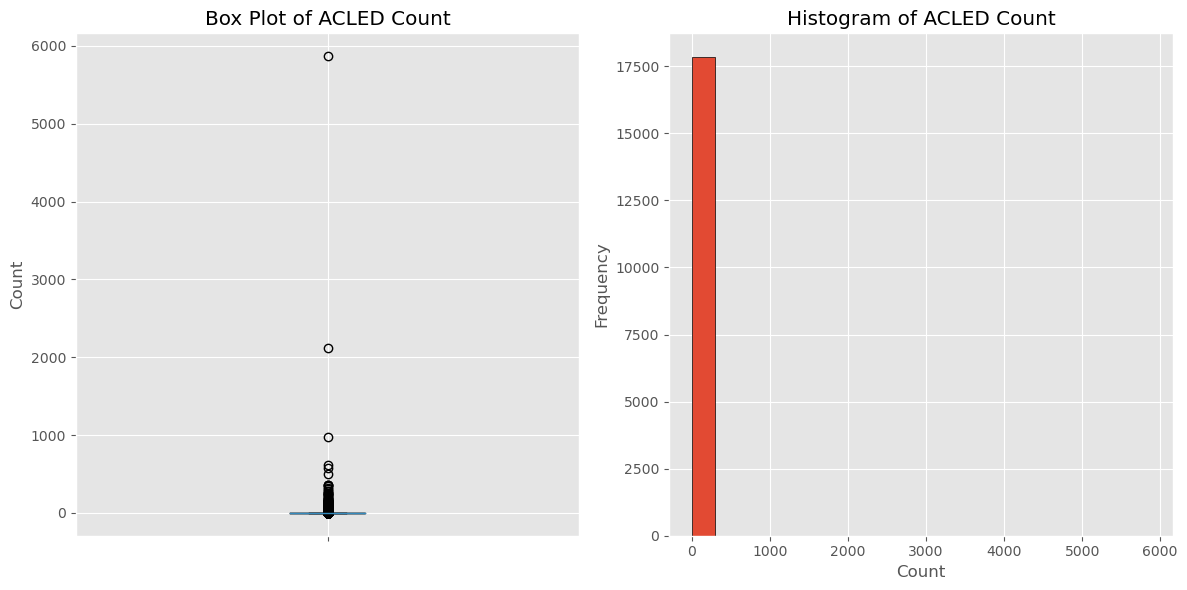

In [142]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot a box plot
axs[0].boxplot(merged_df['acled_count'])
axs[0].set_title('Box Plot of ACLED Count')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels([''])

# Plot a histogram
axs[1].hist(merged_df['acled_count'], bins=20, edgecolor='black')
axs[1].set_title('Histogram of ACLED Count')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: xlabel='acled_count', ylabel='fireCount'>

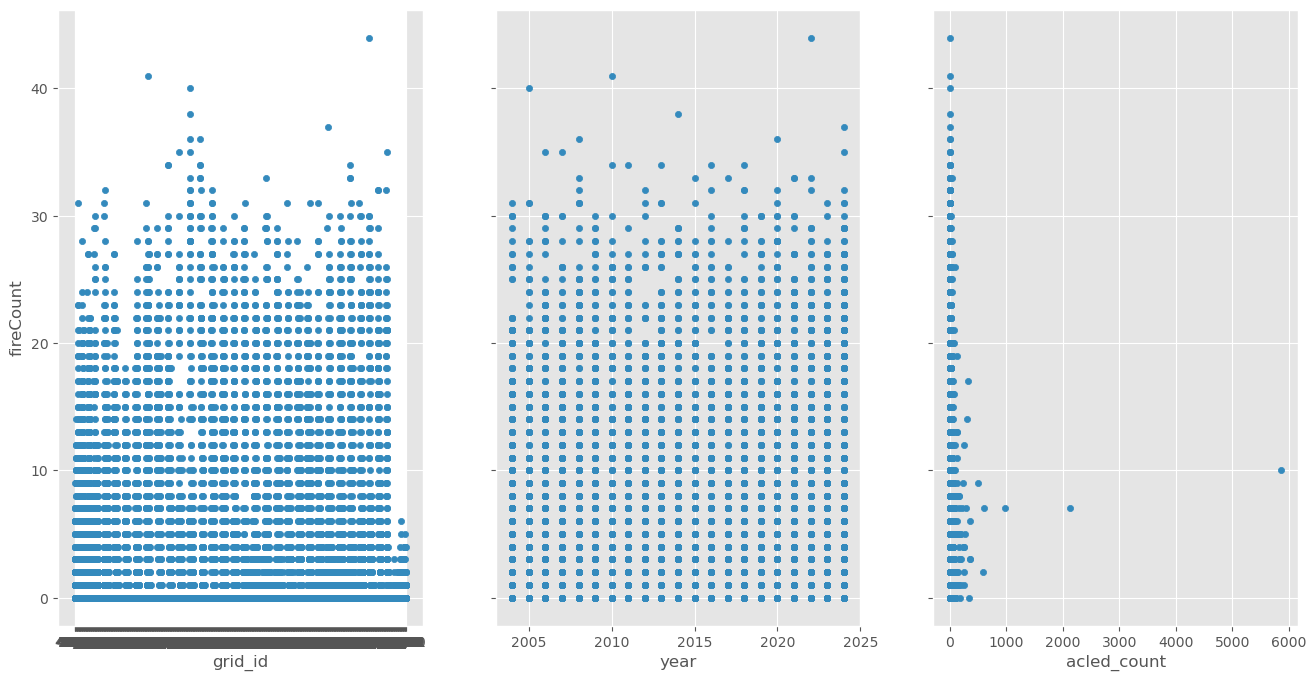

In [143]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
merged_df.plot(kind='scatter', x='grid_id', y='fireCount', ax=axs[0], figsize=(16, 8))
merged_df.plot(kind='scatter', x='year', y='fireCount', ax=axs[1])
merged_df.plot(kind='scatter', x='acled_count', y='fireCount', ax=axs[2])

In [146]:
# import statsmodels.formula.api as smf

# # create a fitted model in one line
# lm = smf.ols(formula='fireCount ~ acled_count', data=merged_df).fit()

# # print the coefficients
# lm.params

**As we have got a complete Panel data we want to see what relationship exist between No. of Fires and ACLED event in a particular Year in a particular grid cell.**

In [147]:
correlation = merged_df['fireCount'].corr(merged_df['acled_count'])
print(f"Overall correlation between fire counts and ACLED events: {correlation}")

# Correlation by year
yearly_correlation = merged_df.groupby('year').apply(lambda x: x['fireCount'].corr(x['acled_count']))
print("Correlation by year:")
print(yearly_correlation)

Overall correlation between fire counts and ACLED events: 0.02700227474487936
Correlation by year:
year
2004                                     0.0574
2005                                     0.0194
2006                                     0.0309
2007                                     0.0647
2008                                     0.0324
2009                                     0.0316
2010                                     0.0041
2011                                     0.0968
2012                                     0.0809
2013                                     0.0830
2014                                     0.0633
2015                                     0.0895
2016                                     0.1245
2017                                     0.0497
2018                                     0.0762
2019                                     0.0570
2020                                     0.0824
2021                                     0.1174
2022                            

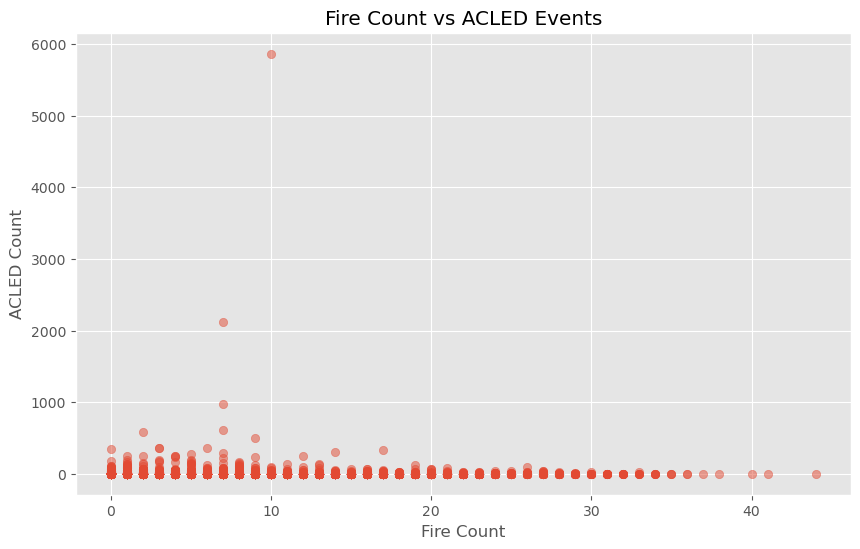

In [148]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['fireCount'], merged_df['acled_count'], alpha=0.5)
plt.xlabel('Fire Count')
plt.ylabel('ACLED Count')
plt.title('Fire Count vs ACLED Events')
plt.show()

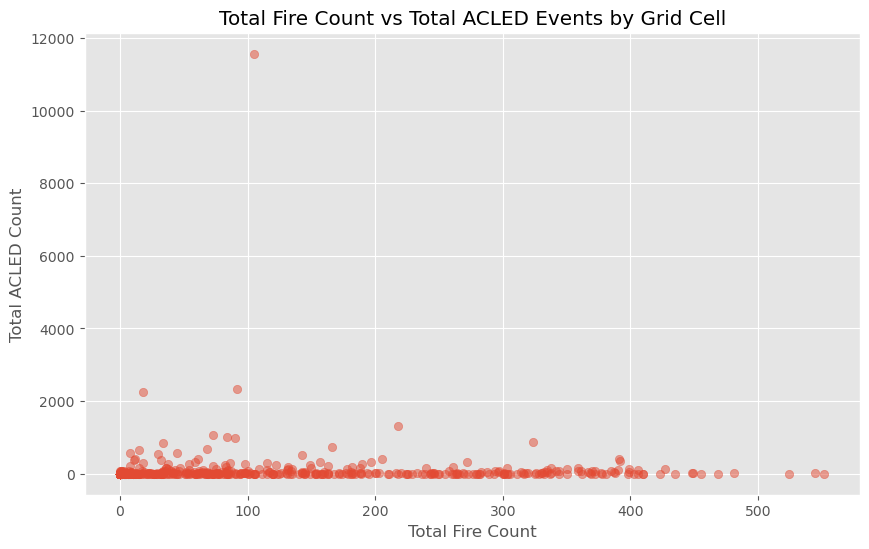

In [147]:
grid_data = merged_df.groupby('grid_id').agg({'fireCount': 'sum', 'acled_count': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(grid_data['fireCount'], grid_data['acled_count'], alpha=0.5)
plt.xlabel('Total Fire Count')
plt.ylabel('Total ACLED Count')
plt.title('Total Fire Count vs Total ACLED Events by Grid Cell')
plt.show()

**Here we are looking at 18 Years of Data for Sudan which consist of Fire data and Acled Conflict Data. 
Now we want to know which year has maximum fire Count and ACLED Count**

In [149]:
# Extract year from 'id_year' column
# gdf['year'] = gdf['grid_id'].astype(str).str[-4:].astype(int)

# Group by year and sum the counts
yearly_counts = gdf.groupby('year').agg({
    'fireCount': 'sum',
    'acled_count': 'sum'
}).reset_index()

# Find the year with maximum fire counts
max_fire_year = yearly_counts.loc[yearly_counts['fireCount'].idxmax()]

# Find the year with maximum ACLED counts
max_acled_year = yearly_counts.loc[yearly_counts['acled_count'].idxmax()]

# Print the results
print("Year with maximum fire counts:")
print(f"Year: {max_fire_year['year']}")
print(f"Total fire count: {max_fire_year['fireCount']}")
print("\n")

print("Year with maximum ACLED counts:")
print(f"Year: {max_acled_year['year']}")
print(f"Total ACLED count: {max_acled_year['acled_count']}")

# If you want to see the counts for all years
print("\nYearly counts:")
print(yearly_counts.sort_values('year'))

Year with maximum fire counts:
Year: 2023
Total fire count: 3701


Year with maximum ACLED counts:
Year: 2023
Total ACLED count: 11068

Yearly counts:
    year  fireCount  acled_count
0   2004       2740          961
1   2005       2331          560
2   2006       2600          288
3   2007       2841          222
4   2008       3044          428
5   2009       2849          277
6   2010       2609          220
7   2011       2242          340
8   2012       2235         1377
9   2013       2869         1946
10  2014       2419         2464
11  2015       2443         2493
12  2016       2324         2528
13  2017       2442         1460
14  2018       2758         1357
15  2019       3016         2241
16  2020       3315         1493
17  2021       3434         2374
18  2022       3690         3796
19  2023       3701        11068
20  2024       3530         5762


**We see that Year 2023 has the maximum fire count and ACLED count which is the year of Conflict**

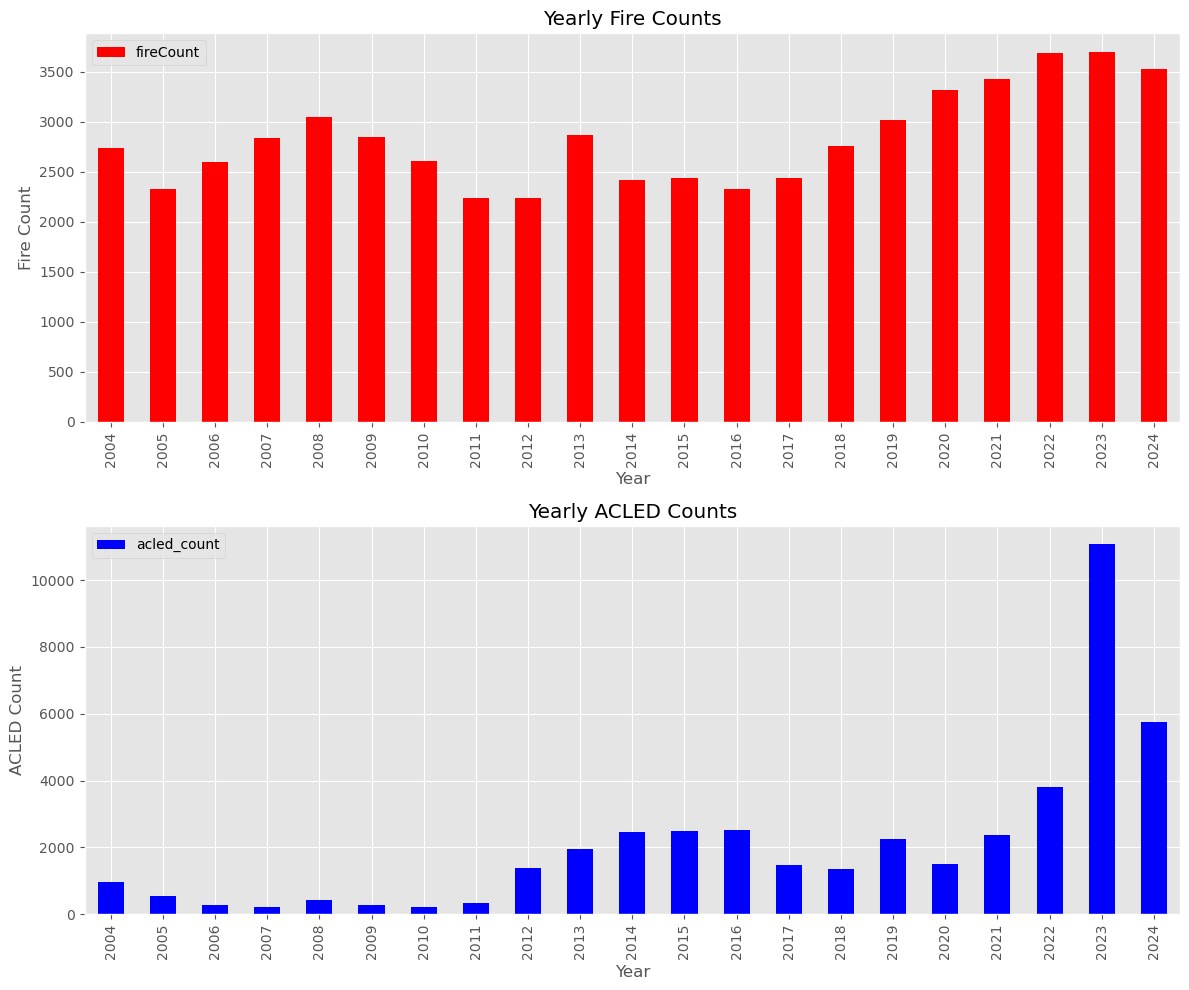

In [150]:
# Create a bar plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

yearly_counts.plot(x='year', y='fireCount', kind='bar', ax=ax1, color='red')
ax1.set_title('Yearly Fire Counts')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fire Count')

yearly_counts.plot(x='year', y='acled_count', kind='bar', ax=ax2, color='blue')
ax2.set_title('Yearly ACLED Counts')
ax2.set_xlabel('Year')
ax2.set_ylabel('ACLED Count')

# Save the figure
plt.savefig('FIRE_counts_BAR_Plot.png', dpi=300, bbox_inches='tight')
plt.savefig('ACLED_counts_BAR_Plot.png', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

**AGGREGATION BY GRID_ID**

In [151]:
grid_year_agg = merged_df.groupby(['grid_id', 'year']).agg({
    'fireCount': 'sum',
    'acled_count': 'sum'
}).reset_index()

print(grid_year_agg.head(21))

   grid_id  year  fireCount  acled_count
0    48,28  2004          9            0
1    48,28  2005          4            0
2    48,28  2006          4            0
3    48,28  2007          3            0
4    48,28  2008          2            0
5    48,28  2009          1            0
6    48,28  2010          2            0
7    48,28  2011          2            0
8    48,28  2012          2            0
9    48,28  2013          0            0
10   48,28  2014          0            0
11   48,28  2015          3            0
12   48,28  2016          0            0
13   48,28  2017          2            0
14   48,28  2018          1            0
15   48,28  2019          4            0
16   48,28  2020          7            2
17   48,28  2021          6            4
18   48,28  2022          2            4
19   48,28  2023          6            2
20   48,28  2024          2            0


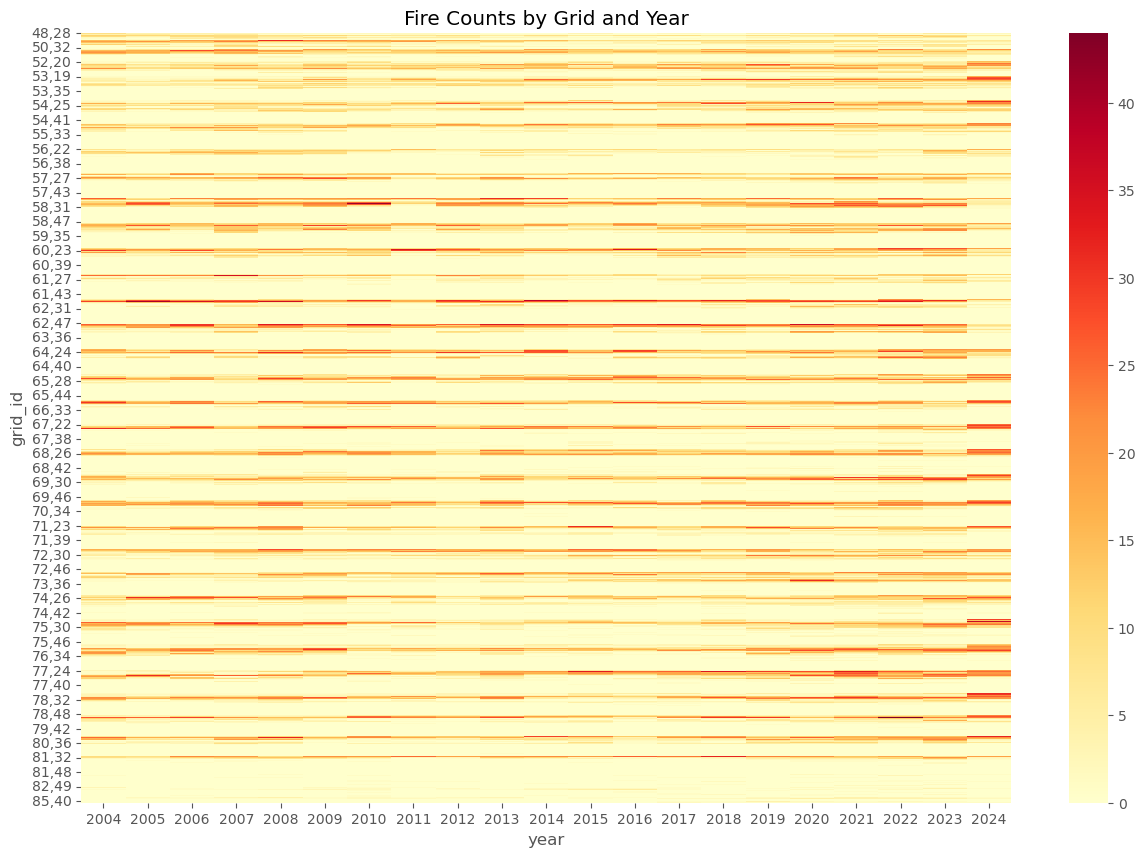

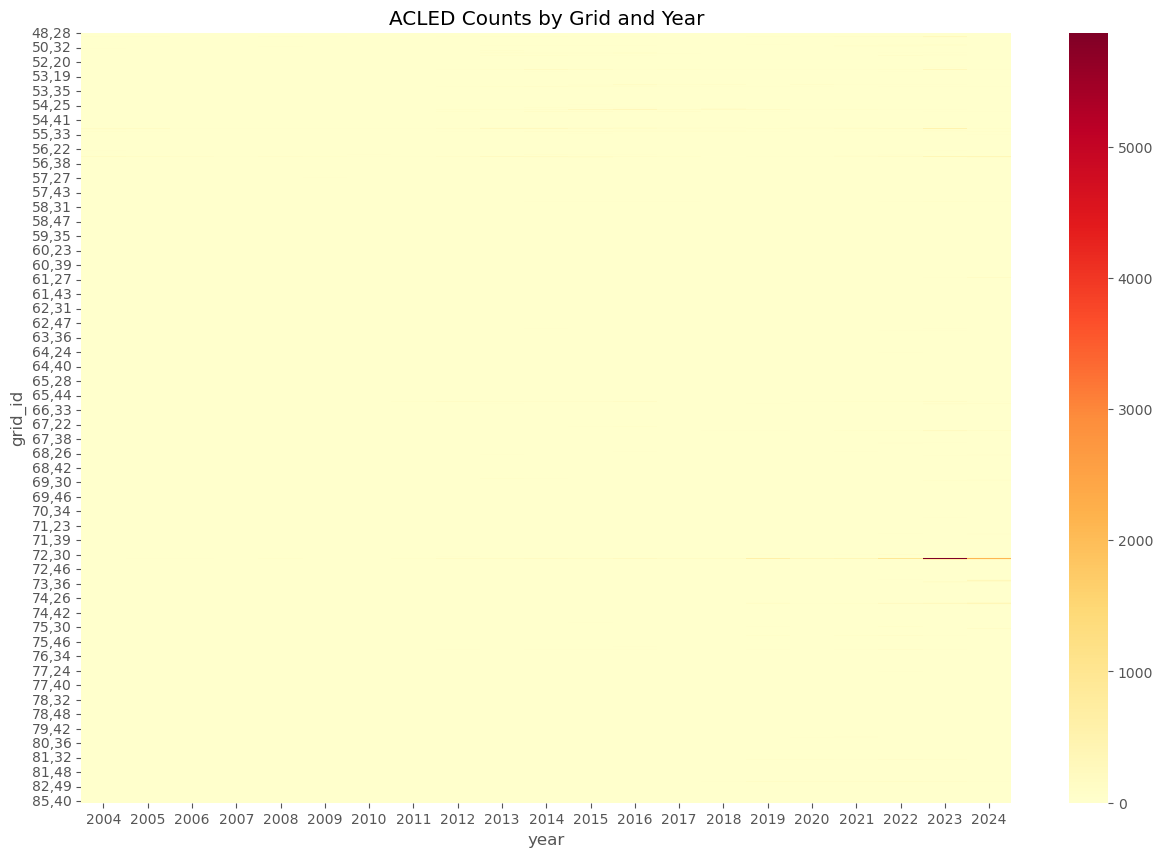

In [152]:
# Pivot the data to create a grid_id by year matrix of fire counts
fire_pivot = gdf.pivot(index='grid_id', columns='year', values='fireCount')

plt.figure(figsize=(15, 10))
sns.heatmap(fire_pivot, cmap='YlOrRd')
plt.title('Fire Counts by Grid and Year')
plt.show()

# Do the same for ACLED counts
acled_pivot = gdf.pivot(index='grid_id', columns='year', values='acled_count')

plt.figure(figsize=(15, 10))
sns.heatmap(acled_pivot, cmap='YlOrRd')
plt.title('ACLED Counts by Grid and Year')
plt.show()

**Panel Regression**

In [153]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Prepare the data
gdf['constant'] = 1
gdf = gdf.sort_values(['grid_id', 'year'])

# Fit a mixed linear model
model = MixedLM.from_formula("fireCount ~ acled_count + year", data=gdf, groups="grid_id")
results = model.fit()

print(results.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  fireCount  
No. Observations:  17850    Method:              REML       
No. Groups:        850      Scale:               9.2375     
Min. group size:   21       Log-Likelihood:      -46976.9585
Max. group size:   21       Converged:           Yes        
Mean group size:   21.0                                     
------------------------------------------------------------
             Coef.   Std.Err.    z    P>|z|  [0.025   0.975]
------------------------------------------------------------
Intercept   -108.315    7.576 -14.298 0.000 -123.163 -93.467
acled_count    0.001    0.001   2.135 0.033    0.000   0.002
year           0.055    0.004  14.741 0.000    0.048   0.063
grid_id Var   29.637    0.492                               



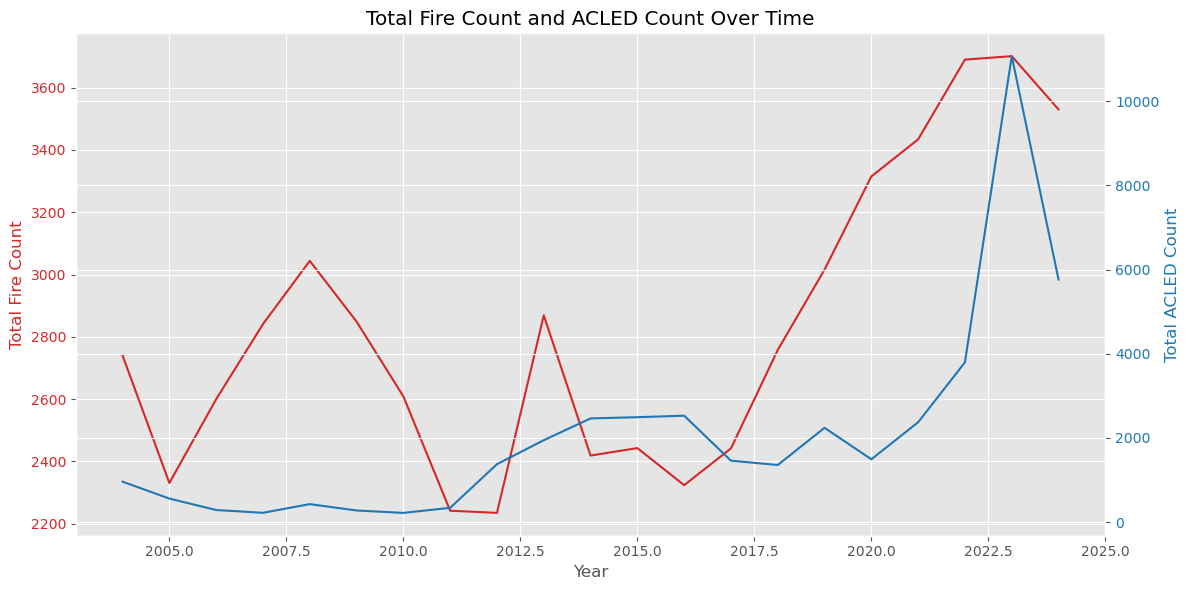

In [154]:
# Calculate yearly totals
yearly_totals = gdf.groupby('year').agg({'fireCount': 'sum', 'acled_count': 'sum'}).reset_index()

# Plot yearly totals
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Fire Count', color='tab:red')
ax1.plot(yearly_totals['year'], yearly_totals['fireCount'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Total ACLED Count', color='tab:blue')
ax2.plot(yearly_totals['year'], yearly_totals['acled_count'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Total Fire Count and ACLED Count Over Time')
fig.tight_layout()
plt.show()

**Scatter plot** 

In [155]:
merged_df

,grid_id,year,fireCount,acled_count,geometry_fire
0,"48,28",2004,9,0,POLYGON ((21.559566818868515 12.57641397767330...
1,"48,29",2004,4,2,POLYGON ((21.559566818868515 13.02557161973306...
2,"49,27",2004,7,0,POLYGON ((22.008724460928274 12.12725633561354...
3,"49,28",2004,12,0,POLYGON ((22.008724460928274 12.57641397767330...
4,"49,29",2004,10,50,POLYGON ((22.008724460928274 13.02557161973306...
...,...,...,...,...,...
17845,"84,41",2024,2,0,"POLYGON ((37.7292419330199 18.41546332445019, ..."
17846,"84,42",2024,0,0,"POLYGON ((37.7292419330199 18.86462096650995, ..."
17847,"85,39",2024,0,0,POLYGON ((38.17839957507966 17.517148040330667...
17848,"85,40",2024,0,0,POLYGON ((38.17839957507966 17.966305682390427...


In [156]:
gdf

,grid_id,year,fireCount,acled_count,geometry_fire,constant
0,"48,28",2004,9,0,"POLYGON ((21.55957 12.57641, 21.55957 13.02557...",1
850,"48,28",2005,4,0,"POLYGON ((21.55957 12.57641, 21.55957 13.02557...",1
1700,"48,28",2006,4,0,"POLYGON ((21.55957 12.57641, 21.55957 13.02557...",1
2550,"48,28",2007,3,0,"POLYGON ((21.55957 12.57641, 21.55957 13.02557...",1
3400,"48,28",2008,2,0,"POLYGON ((21.55957 12.57641, 21.55957 13.02557...",1
...,...,...,...,...,...,...
14449,"85,41",2020,1,0,"POLYGON ((38.17840 18.41546, 38.17840 18.86462...",1
15299,"85,41",2021,1,0,"POLYGON ((38.17840 18.41546, 38.17840 18.86462...",1
16149,"85,41",2022,1,0,"POLYGON ((38.17840 18.41546, 38.17840 18.86462...",1
16999,"85,41",2023,1,0,"POLYGON ((38.17840 18.41546, 38.17840 18.86462...",1


Converting the ACLED Count into binary 0 with no events and 1 with more than one event

In [157]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt

merged_df['acled_binary'] = np.where(merged_df['acled_count'] > 0, 1, 0)

# Print the distribution of the new variable
print(merged_df['acled_binary'].value_counts(normalize=True))

acled_binary
0                                     0.8780
1                                     0.1220
Name: proportion, dtype: float64


Running Logistic Regression

In [158]:
# Prepare the data
merged_df['constant'] = 1
merged_df = merged_df.sort_values(['grid_id', 'year'])

# Run logistic regression
model = logit("acled_binary ~ fireCount + year", data=merged_df).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.341993
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           acled_binary   No. Observations:                17850
Model:                          Logit   Df Residuals:                    17847
Method:                           MLE   Df Model:                            2
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                 0.07800
Time:                        12:46:18   Log-Likelihood:                -6104.6
converged:                       True   LL-Null:                       -6621.0
Covariance Type:            nonrobust   LLR p-value:                5.272e-225
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -175.0388      8.294    -21.105      0.000    -191.295    -158.783
fireCount      0.0707      0.

In [159]:
merged_df

,grid_id,year,fireCount,acled_count,geometry_fire,acled_binary,constant
0,"48,28",2004,9,0,POLYGON ((21.559566818868515 12.57641397767330...,0,1
850,"48,28",2005,4,0,POLYGON ((21.559566818868515 12.57641397767330...,0,1
1700,"48,28",2006,4,0,POLYGON ((21.559566818868515 12.57641397767330...,0,1
2550,"48,28",2007,3,0,POLYGON ((21.559566818868515 12.57641397767330...,0,1
3400,"48,28",2008,2,0,POLYGON ((21.559566818868515 12.57641397767330...,0,1
...,...,...,...,...,...,...,...
14449,"85,41",2020,1,0,"POLYGON ((38.17839957507966 18.41546332445019,...",0,1
15299,"85,41",2021,1,0,"POLYGON ((38.17839957507966 18.41546332445019,...",0,1
16149,"85,41",2022,1,0,"POLYGON ((38.17839957507966 18.41546332445019,...",0,1
16999,"85,41",2023,1,0,"POLYGON ((38.17839957507966 18.41546332445019,...",0,1


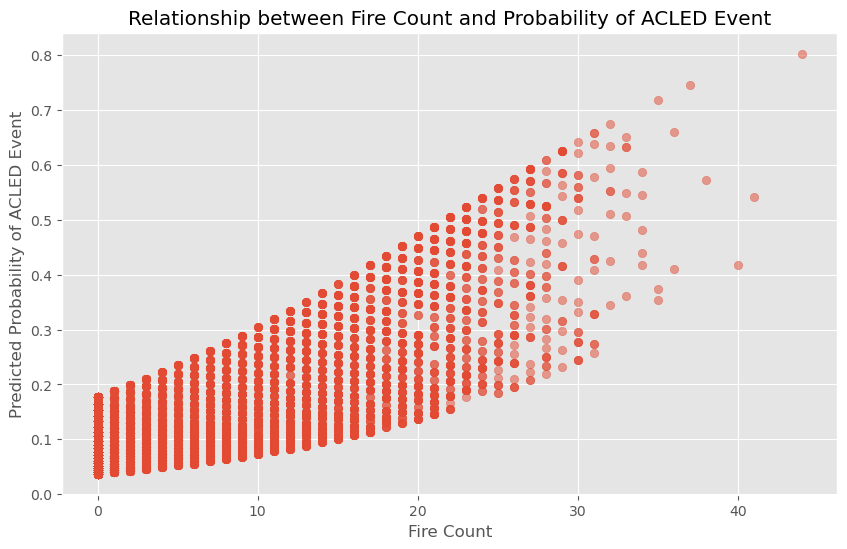

In [160]:
# Predict probabilities
merged_df['predicted_prob'] = model.predict(merged_df)

# Plot the relationship between fire count and predicted probability of ACLED event
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['fireCount'], merged_df['predicted_prob'], alpha=0.5)
plt.xlabel('Fire Count')
plt.ylabel('Predicted Probability of ACLED Event')
plt.title('Relationship between Fire Count and Probability of ACLED Event')
plt.show()

In [161]:
# from statsmodels.discrete.discrete_model import Panel
# import statsmodels.api as sm

# # Prepare the data
# df = merged_df.set_index(['grid_id', 'year'])

# # Fit the model
# panel_model = Panel(df['acled_binary'], df[['fireCount', 'year']], logit=True, fixed_effects=True)
# panel_results = panel_model.fit()

# print(panel_results.summary())

In [162]:
# Use fire count as the dependent variable
fire_model = sm.OLS.from_formula("fireCount ~ acled_binary + year", data=merged_df).fit()

print(fire_model.summary())

                            OLS Regression Results                            
Dep. Variable:              fireCount   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     373.7
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          1.04e-159
Time:                        12:47:50   Log-Likelihood:                -57652.
No. Observations:               17850   AIC:                         1.153e+05
Df Residuals:                   17847   BIC:                         1.153e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -41.3755     15.441     -2.680   

In [164]:
# Create lagged fire count
merged_df['fireCount_lag'] = merged_df.groupby('grid_id')['fireCount'].shift(1)

# Run logistic regression with lagged fire count
lagged_model = logit("acled_binary ~ fireCount_lag + year", data=merged_df.dropna()).fit()

print(lagged_model.summary())

Optimization terminated successfully.
         Current function value: 0.343714
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           acled_binary   No. Observations:                17000
Model:                          Logit   Df Residuals:                    16997
Method:                           MLE   Df Model:                            2
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                 0.08186
Time:                        12:47:58   Log-Likelihood:                -5843.1
converged:                       True   LL-Null:                       -6364.1
Covariance Type:            nonrobust   LLR p-value:                5.531e-227
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -192.2684      8.915    -21.566      0.000    -209.742    -174.795
fireCount_lag     0.

In [165]:
# plt.figure(figsize=(12, 8))
# plt.scatter(grid_year_agg['fireCount'], grid_year_agg['acled_count'], alpha=0.5)
# plt.xlabel('Fire Count')
# plt.ylabel('ACLED Count')
# plt.title('Fire Count vs ACLED Events by Grid Cell and Year')
# plt.show()

**Correlation Analysis by Grid Cell over Years**

In [166]:
# def calc_correlation(group):
#     return group['fireCount'].corr(group['acled_count'])

# grid_correlations = merged_df.groupby('grid_id').apply(calc_correlation)

# plt.figure(figsize=(12, 6))
# plt.hist(grid_correlations, bins=30)
# plt.xlabel('Correlation Coefficient')
# plt.ylabel('Number of Grid Cells')
# plt.title('Distribution of Fire-ACLED Correlations Across Grid Cells (Over Years)')
# plt.show()

In [167]:
# # Create pivot tables
# pivot_fire = merged_df.pivot(index='grid_id', columns='year', values='fireCount')
# pivot_acled = merged_df.pivot(index='grid_id', columns='year', values='acled_count')

# # Create the heatmaps
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

# sns.heatmap(pivot_fire, ax=ax1, cmap='viridis')
# ax1.set_title('Fire Counts by Grid Cell and Year')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Grid Cell')

# sns.heatmap(pivot_acled, ax=ax2, cmap='viridis')
# ax2.set_title('ACLED Events by Grid Cell and Year')
# ax2.set_xlabel('Year')
# ax2.set_ylabel('Grid Cell')

# plt.tight_layout()
# plt.show()

In [168]:
top_fire_cells = grid_year_agg.nlargest(10, 'fireCount')
top_acled_cells = grid_year_agg.nlargest(10, 'acled_count')

print("Top 10 Grid Cell-Year Combinations by Fire Count:")
print(top_fire_cells[['grid_id', 'year', 'fireCount', 'acled_count']])

print("\nTop 10 Grid Cell-Year Combinations by ACLED Count:")
print(top_acled_cells[['grid_id', 'year', 'fireCount', 'acled_count']])

Top 10 Grid Cell-Year Combinations by Fire Count:
      grid_id  year  fireCount  acled_count
15873   79,29  2022         44            0
3954    58,27  2010         41            0
6217    62,23  2005         40            0
6205    62,22  2014         38            0
13649   75,23  2024         37            0
6220    62,23  2008         36            0
6778    63,22  2020         36            0
5631    61,23  2007         35            0
6218    62,23  2006         35            0
16799   81,31  2024         35            0

Top 10 Grid Cell-Year Combinations by ACLED Count:
      grid_id  year  fireCount  acled_count
12199   72,34  2023         10         5867
12200   72,34  2024          7         2121
12198   72,34  2022          7          976
12195   72,34  2019          7          611
12220   72,35  2023          2          579
2224    55,26  2023          9          505
2876    56,30  2024          3          361
12197   72,34  2021          6          356
13250   74,32  202

**TIME SERIES FOR SPECIFIC GRID CELL**

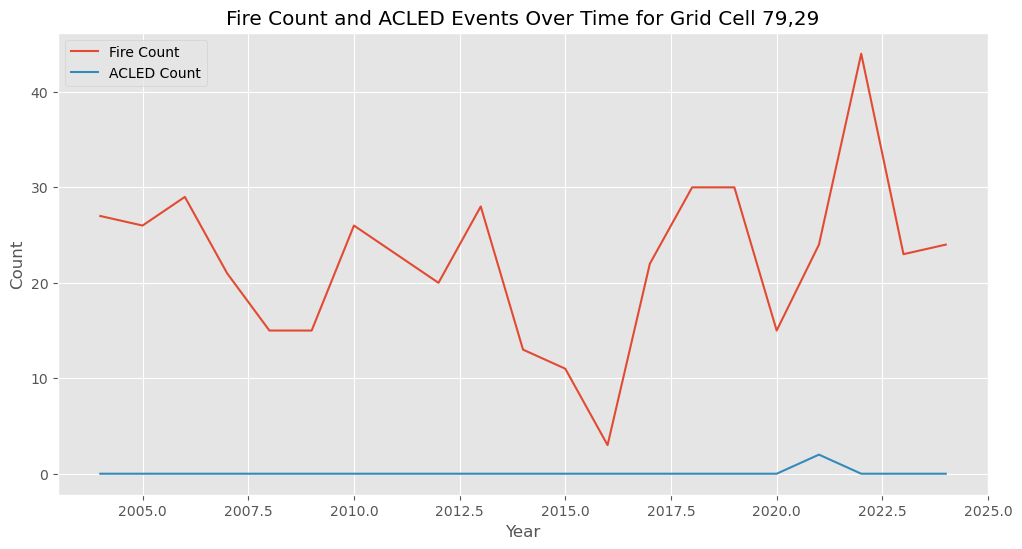

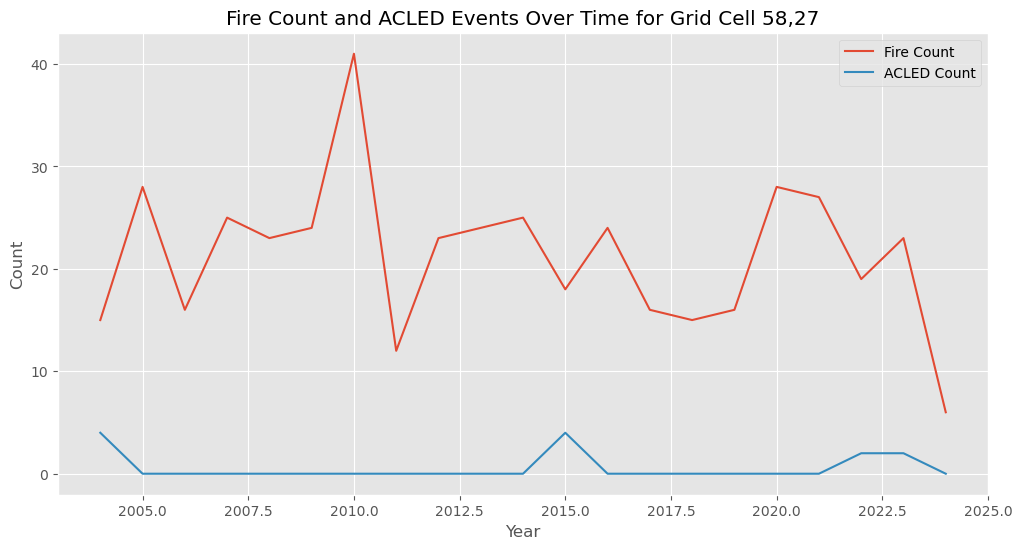

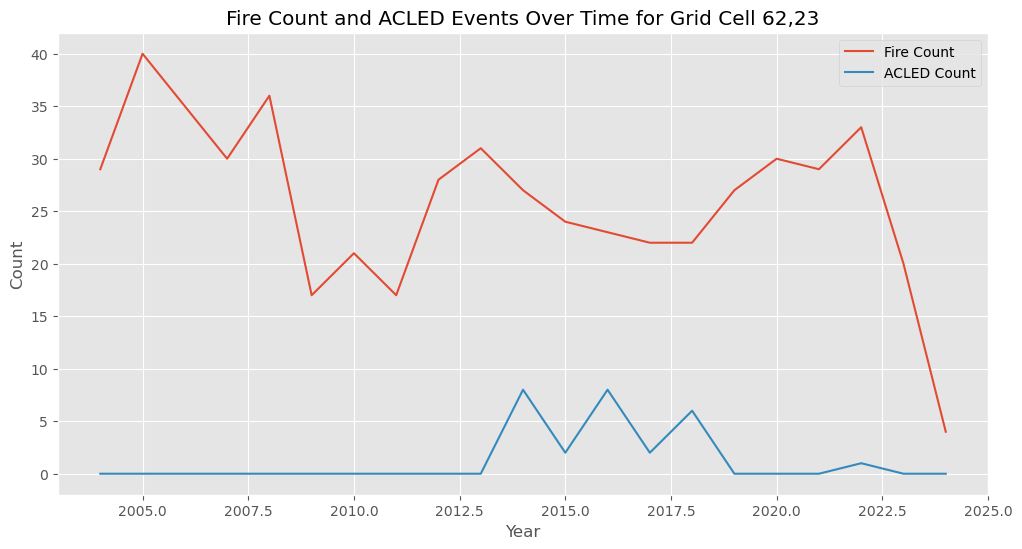

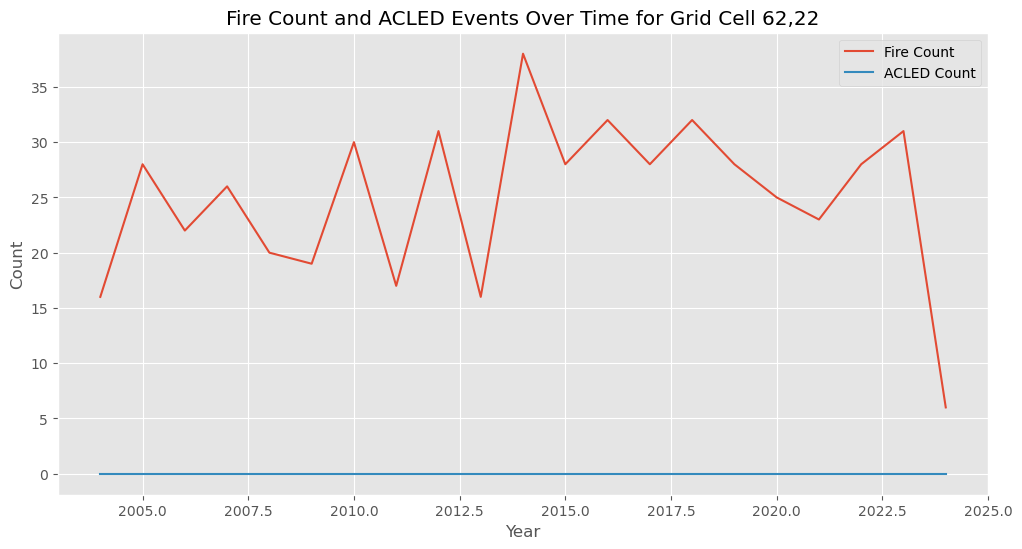

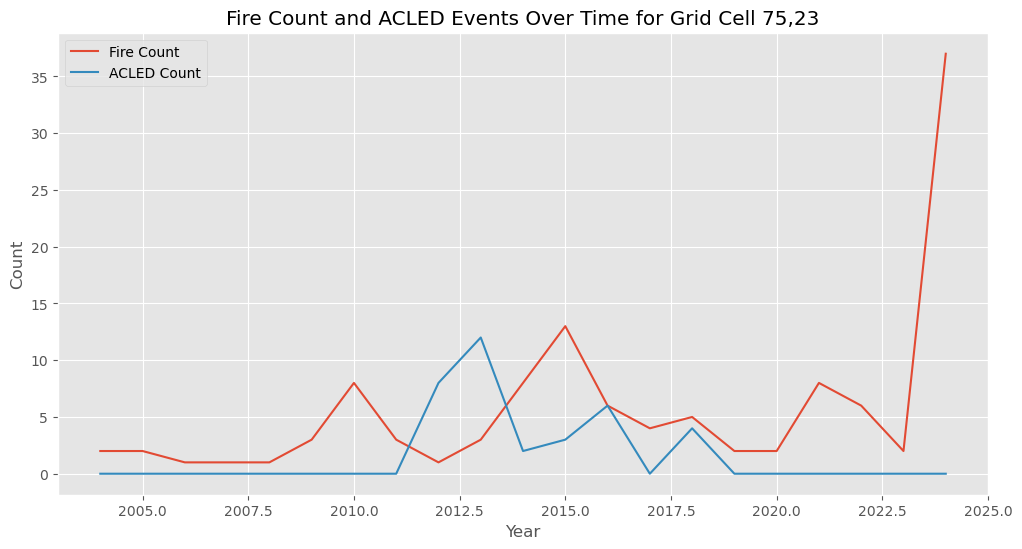

In [169]:
interesting_cells = top_fire_cells['grid_id'].unique()[:5]  # Top 5 by fire count

for cell in interesting_cells:
    cell_data = merged_df[merged_df['grid_id'] == cell]
    
    plt.figure(figsize=(12, 6))
    plt.plot(cell_data['year'], cell_data['fireCount'], label='Fire Count')
    plt.plot(cell_data['year'], cell_data['acled_count'], label='ACLED Count')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'Fire Count and ACLED Events Over Time for Grid Cell {cell}')
    plt.legend()
    plt.show()

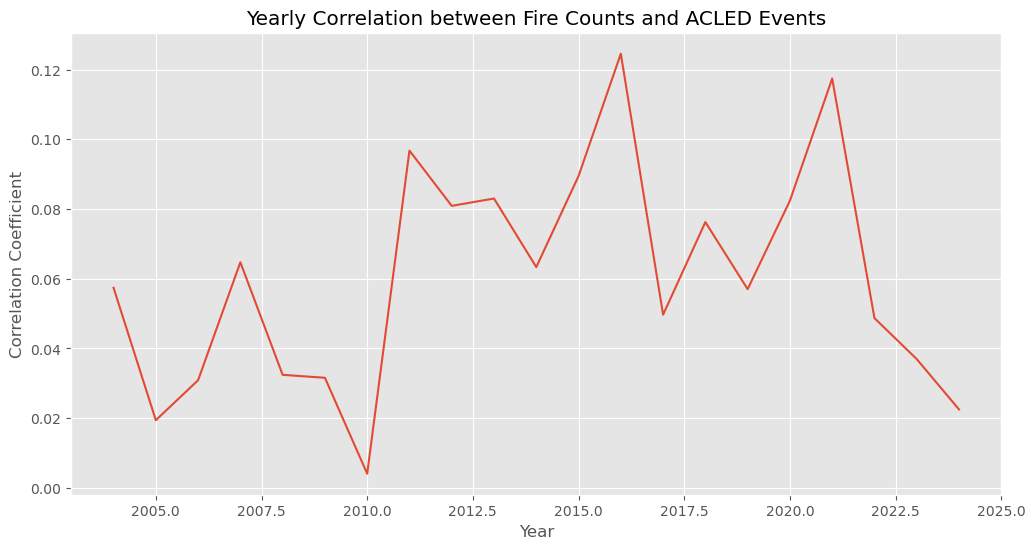

In [170]:
yearly_correlations = merged_df.groupby('year').apply(lambda x: x['fireCount'].corr(x['acled_count']))

plt.figure(figsize=(12, 6))
plt.plot(yearly_correlations.index, yearly_correlations.values)
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.title('Yearly Correlation between Fire Counts and ACLED Events')
plt.show()

In [171]:
# # Assuming your dataframe is named 'merged_df'

# # Group by year and grid_id, and sum the fireCount and acled_count
# grouped_df = merged_df.groupby(['year', 'grid_id']).agg({
#     'fireCount': 'sum',
#     'acled_count': 'sum'
# }).reset_index()

# # Pivot the data to create a matrix of years
# pivot_fire = grouped_df.pivot(index='grid_id', columns='year', values='fireCount').fillna(0)
# pivot_acled = grouped_df.pivot(index='grid_id', columns='year', values='acled_count').fillna(0)

# # Calculate the correlation matrix
# correlation_matrix = np.corrcoef(pivot_fire.T, pivot_acled.T)

# # The correlation matrix will have fire years first, then ACLED years
# # We only want the cross-correlation between fire and ACLED
# n = pivot_fire.shape[1]
# cross_correlation = correlation_matrix[:n, n:]

# # Create the heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(cross_correlation, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1,
#             xticklabels=pivot_acled.columns, yticklabels=pivot_fire.columns)

# plt.title('Correlation between Fire Count and ACLED Events Across Years')
# plt.xlabel('ACLED Events Year')
# plt.ylabel('Fire Count Year')
# plt.show()

Each cell in the heatmap represents the correlation between fires in the year on the y-axis and ACLED events in the year on the x-axis. The color indicates the strength and direction of the correlation:

Red colors indicate positive correlations (more fires associated with more ACLED events)
Blue colors indicate negative correlations (more fires associated with fewer ACLED events)
White or light colors indicate little to no correlation

Making a claim about Anomolous fire and those fires that are conflict induced. Calculating mean value of fire and standard deviation within each grid cell

In [172]:
# Group by grid_id and calculate mean and standard deviation of fire counts
fire_stats = merged_df.groupby('grid_id').agg({
    'fireCount': ['mean', 'std']
}).reset_index()

# Flatten column names
fire_stats.columns = ['grid_id', 'fire_mean', 'fire_std']

# Merge these statistics back to the original dataframe
merged_df_with_stats = pd.merge(merged_df, fire_stats, on='grid_id')

# Calculate z-scores for each fire count
merged_df_with_stats['fire_z_score'] = (merged_df_with_stats['fireCount'] - merged_df_with_stats['fire_mean']) / merged_df_with_stats['fire_std']

# Identify anomalous fires (e.g., those with z-score > 2 or < -2)
merged_df_with_stats['is_anomalous'] = abs(merged_df_with_stats['fire_z_score']) > 2

# Calculate the correlation between anomalous fires and ACLED events
correlation = merged_df_with_stats['is_anomalous'].corr(merged_df_with_stats['acled_count'])

print(f"Correlation between anomalous fires and ACLED events: {correlation:.4f}")

# Display some summary statistics
print(merged_df_with_stats[['grid_id', 'year', 'fireCount', 'acled_count', 'fire_mean', 'fire_std', 'fire_z_score', 'is_anomalous']].head(10))

# Count of anomalous fire events
anomalous_count = merged_df_with_stats['is_anomalous'].sum()
total_count = len(merged_df_with_stats)
print(f"\nNumber of anomalous fire events: {anomalous_count} out of {total_count} ({anomalous_count/total_count:.2%})")

# Average ACLED count for anomalous vs. non-anomalous fire events
avg_acled_anomalous = merged_df_with_stats[merged_df_with_stats['is_anomalous']]['acled_count'].mean()
avg_acled_normal = merged_df_with_stats[~merged_df_with_stats['is_anomalous']]['acled_count'].mean()
print(f"\nAverage ACLED count for anomalous fire events: {avg_acled_anomalous:.2f}")
print(f"Average ACLED count for non-anomalous fire events: {avg_acled_normal:.2f}")

Correlation between anomalous fires and ACLED events: 0.0455
  grid_id  year  fireCount  acled_count  \
0   48,28  2004          9            0   
1   48,28  2005          4            0   
2   48,28  2006          4            0   
3   48,28  2007          3            0   
4   48,28  2008          2            0   
5   48,28  2009          1            0   
6   48,28  2010          2            0   
7   48,28  2011          2            0   
8   48,28  2012          2            0   
9   48,28  2013          0            0   

                                 fire_mean  \
0                                   2.9524   
1                                   2.9524   
2                                   2.9524   
3                                   2.9524   
4                                   2.9524   
5                                   2.9524   
6                                   2.9524   
7                                   2.9524   
8                                   2.9524   
9    

**including the Acled event here**

In [173]:
# Calculate statistics for both fire counts and ACLED events
stats = merged_df.groupby('grid_id').agg({
    'fireCount': ['mean', 'std'],
    'acled_count': ['mean', 'std']
}).reset_index()

# Flatten column names
stats.columns = ['grid_id', 'fire_mean', 'fire_std', 'acled_mean', 'acled_std']

# Merge these statistics back to the original dataframe
merged_df_with_stats = pd.merge(merged_df, stats, on='grid_id')

# Calculate z-scores for both fire counts and ACLED events
merged_df_with_stats['fire_z_score'] = (merged_df_with_stats['fireCount'] - merged_df_with_stats['fire_mean']) / merged_df_with_stats['fire_std']
merged_df_with_stats['acled_z_score'] = (merged_df_with_stats['acled_count'] - merged_df_with_stats['acled_mean']) / merged_df_with_stats['acled_std']

# Identify anomalous events (e.g., those with z-score > 2 or < -2)
merged_df_with_stats['is_fire_anomalous'] = abs(merged_df_with_stats['fire_z_score']) > 2
merged_df_with_stats['is_acled_anomalous'] = abs(merged_df_with_stats['acled_z_score']) > 2

# Calculate the correlation between anomalous fires and anomalous ACLED events
correlation = merged_df_with_stats['is_fire_anomalous'].corr(merged_df_with_stats['is_acled_anomalous'])

print(f"Correlation between anomalous fires and anomalous ACLED events: {correlation:.4f}")

# Display some summary statistics
print(merged_df_with_stats[['grid_id', 'year', 'fireCount', 'acled_count', 'fire_z_score', 'acled_z_score', 'is_fire_anomalous', 'is_acled_anomalous']].head(10))

# Count of anomalous events
fire_anomalous_count = merged_df_with_stats['is_fire_anomalous'].sum()
acled_anomalous_count = merged_df_with_stats['is_acled_anomalous'].sum()
total_count = len(merged_df_with_stats)
print(f"\nNumber of anomalous fire events: {fire_anomalous_count} out of {total_count} ({fire_anomalous_count/total_count:.2%})")
print(f"Number of anomalous ACLED events: {acled_anomalous_count} out of {total_count} ({acled_anomalous_count/total_count:.2%})")

# Count of cases where both fire and ACLED events are anomalous
both_anomalous = (merged_df_with_stats['is_fire_anomalous'] & merged_df_with_stats['is_acled_anomalous']).sum()
print(f"Number of cases where both fire and ACLED events are anomalous: {both_anomalous} ({both_anomalous/total_count:.2%})")

# Average ACLED count for anomalous vs. non-anomalous fire events
avg_acled_fire_anomalous = merged_df_with_stats[merged_df_with_stats['is_fire_anomalous']]['acled_count'].mean()
avg_acled_fire_normal = merged_df_with_stats[~merged_df_with_stats['is_fire_anomalous']]['acled_count'].mean()
print(f"\nAverage ACLED count for anomalous fire events: {avg_acled_fire_anomalous:.2f}")
print(f"Average ACLED count for non-anomalous fire events: {avg_acled_fire_normal:.2f}")

# Average fire count for anomalous vs. non-anomalous ACLED events
avg_fire_acled_anomalous = merged_df_with_stats[merged_df_with_stats['is_acled_anomalous']]['fireCount'].mean()
avg_fire_acled_normal = merged_df_with_stats[~merged_df_with_stats['is_acled_anomalous']]['fireCount'].mean()
print(f"\nAverage fire count for anomalous ACLED events: {avg_fire_acled_anomalous:.2f}")
print(f"Average fire count for non-anomalous ACLED events: {avg_fire_acled_normal:.2f}")

Correlation between anomalous fires and anomalous ACLED events: 0.0496
  grid_id  year  fireCount  acled_count  \
0   48,28  2004          9            0   
1   48,28  2005          4            0   
2   48,28  2006          4            0   
3   48,28  2007          3            0   
4   48,28  2008          2            0   
5   48,28  2009          1            0   
6   48,28  2010          2            0   
7   48,28  2011          2            0   
8   48,28  2012          2            0   
9   48,28  2013          0            0   

                              fire_z_score  \
0                                   2.5226   
1                                   0.4370   
2                                   0.4370   
3                                   0.0199   
4                                  -0.3973   
5                                  -0.8144   
6                                  -0.3973   
7                                  -0.3973   
8                                  -0.397

In [174]:
# Calculate the mean number of fires per grid cell
mean_fires_per_grid = merged_df.groupby('grid_id')['fireCount'].mean().mean()

print(f"The mean number of fires in a particular grid cell is: {mean_fires_per_grid:.2f}")

# Let's also get some additional statistics
median_fires_per_grid = merged_df.groupby('grid_id')['fireCount'].mean().median()
min_fires_per_grid = merged_df.groupby('grid_id')['fireCount'].mean().min()
max_fires_per_grid = merged_df.groupby('grid_id')['fireCount'].mean().max()

print(f"Median number of fires per grid cell: {median_fires_per_grid:.2f}")
print(f"Minimum mean fires in a grid cell: {min_fires_per_grid:.2f}")
print(f"Maximum mean fires in a grid cell: {max_fires_per_grid:.2f}")

# Distribution of mean fires per grid cell
fire_distribution = merged_df.groupby('grid_id')['fireCount'].mean().describe()
print("\nDistribution of mean fires per grid cell:")
print(fire_distribution)

The mean number of fires in a particular grid cell is: 3.33
Median number of fires per grid cell: 0.14
Minimum mean fires in a grid cell: 0.00
Maximum mean fires in a grid cell: 26.29

Distribution of mean fires per grid cell:
count                                   850.0000
mean                                      3.3295
std                                       5.4853
min                                       0.0000
25%                                       0.0000
50%                                       0.1429
75%                                       4.3214
max                                      26.2857
Name: fireCount, dtype: float64


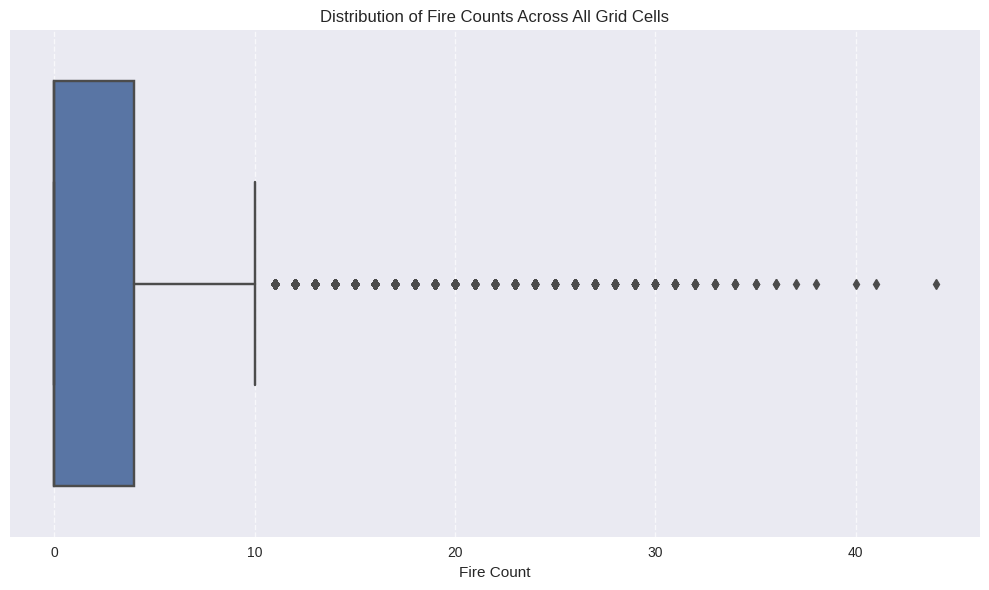

Summary Statistics for Fire Counts:
count                                17,850.0000
mean                                      3.3295
std                                       6.2425
min                                       0.0000
25%                                       0.0000
50%                                       0.0000
75%                                       4.0000
max                                      44.0000
Name: fireCount, dtype: float64

Percentage of outliers: 12.70%


In [175]:
# Set the style for better-looking plots
plt.style.use('seaborn')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['fireCount'])

# Add labels and title
plt.xlabel('Fire Count')
plt.title('Distribution of Fire Counts Across All Grid Cells')

# Remove y-axis labels as they're not meaningful in this context
plt.yticks([])

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print some summary statistics
fire_stats = merged_df['fireCount'].describe()
print("Summary Statistics for Fire Counts:")
print(fire_stats)

# Calculate and print the percentage of outliers
Q1 = merged_df['fireCount'].quantile(0.25)
Q3 = merged_df['fireCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = merged_df[(merged_df['fireCount'] < lower_bound) | (merged_df['fireCount'] > upper_bound)]
outlier_percentage = (len(outliers) / len(merged_df)) * 100

print(f"\nPercentage of outliers: {outlier_percentage:.2f}%")

In [176]:
# from scipy import stats

# # Create a new column to categorize pre and post conflict periods
# merged_df['period'] = merged_df['year'].apply(lambda x: 'Pre-conflict' if x <= 2022 else 'Post-conflict')

# # Function to create a boxplot
# def create_boxplot(data, x, y, title):
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=x, y=y, data=data)
#     plt.title(title)
#     plt.show()

# # Create boxplots
# create_boxplot(merged_df, 'period', 'fireCount', 'Fire Counts: Pre vs Post Conflict')
# create_boxplot(merged_df, 'period', 'acled_count', 'ACLED Events: Pre vs Post Conflict')

# # Calculate and print summary statistics
# def print_summary(data, column, period):
#     summary = data[data['period'] == period][column].describe()
#     print(f"\nSummary statistics for {column} in {period} period:")
#     print(summary)

# print_summary(merged_df, 'fireCount', 'Pre-conflict')
# print_summary(merged_df, 'fireCount', 'Post-conflict')
# print_summary(merged_df, 'acled_count', 'Pre-conflict')
# print_summary(merged_df, 'acled_count', 'Post-conflict')

# # Perform t-tests to compare means
# def perform_ttest(data, column):
#     pre = data[data['period'] == 'Pre-conflict'][column]
#     post = data[data['period'] == 'Post-conflict'][column]
#     t_stat, p_value = stats.ttest_ind(pre, post)
#     print(f"\nt-test results for {column}:")
#     print(f"t-statistic: {t_stat}")
#     print(f"p-value: {p_value}")

# perform_ttest(merged_df, 'fireCount')
# perform_ttest(merged_df, 'acled_count')

# # Calculate correlation between fire counts and ACLED events for each period
# pre_corr = merged_df[merged_df['period'] == 'Pre-conflict']['fireCount'].corr(merged_df[merged_df['period'] == 'Pre-conflict']['acled_count'])
# post_corr = merged_df[merged_df['period'] == 'Post-conflict']['fireCount'].corr(merged_df[merged_df['period'] == 'Post-conflict']['acled_count'])

# print(f"\nCorrelation between fire counts and ACLED events:")
# print(f"Pre-conflict period: {pre_corr:.4f}")
# print(f"Post-conflict period: {post_corr:.4f}")

# # Calculate the percentage change in mean fire counts and ACLED events
# mean_fire_pre = merged_df[merged_df['period'] == 'Pre-conflict']['fireCount'].mean()
# mean_fire_post = merged_df[merged_df['period'] == 'Post-conflict']['fireCount'].mean()
# mean_acled_pre = merged_df[merged_df['period'] == 'Pre-conflict']['acled_count'].mean()
# mean_acled_post = merged_df[merged_df['period'] == 'Post-conflict']['acled_count'].mean()

# fire_change = (mean_fire_post - mean_fire_pre) / mean_fire_pre * 100
# acled_change = (mean_acled_post - mean_acled_pre) / mean_acled_pre * 100

# print(f"\nPercentage change in mean fire counts: {fire_change:.2f}%")
# print(f"Percentage change in mean ACLED events: {acled_change:.2f}%")

**Fire Counts:**

The mean fire count increased from 3.2323 in the pre-conflict period to 4.2535 in the post-conflict period, a 31.60% increase.
The standard deviation also increased, indicating greater variability in fire counts post-conflict.
The maximum fire count decreased from 44 to 37, but the 75th percentile increased from 3 to 6, suggesting more frequent moderate-level fire events.


**ACLED Events:**

The mean ACLED count increased dramatically from 1.6610 to 9.9000, a 496.03% increase.
The standard deviation also increased substantially, indicating much greater variability in conflict events.
The maximum ACLED count jumped from 976 to 5,867, suggesting some extreme conflict events in the post-conflict period.


**T-test Results:**

For both fire counts and ACLED events, the p-values are extremely small (1.37e-10 and 6.08e-11 respectively), much less than 0.05.
This indicates statistically significant differences in both fire counts and ACLED events between the two periods.
The negative t-statistics (-6.42 for fires, -6.55 for ACLED) confirm that both measures increased in the post-conflict period.


**Correlation:**

The correlation between fire counts and ACLED events decreased from 0.0592 to 0.0291.
Both correlations are positive but weak, suggesting a slight tendency for fires and conflicts to occur together.
The weaker correlation in the post-conflict period might indicate that the relationship between fires and conflicts became less direct.




In [177]:
# def calculate_z_scores(df, column):
#     pre_conflict = df[df['period'] == 'Pre-conflict'][column]
#     post_conflict = df[df['period'] == 'Post-conflict'][column]
    
#     pre_z = stats.zscore(pre_conflict)
#     post_z = stats.zscore(post_conflict)
    
#     return pre_z, post_z

# # Calculate z-scores for fire counts
# fire_pre_z, fire_post_z = calculate_z_scores(merged_df, 'fireCount')

# # Calculate z-scores for ACLED events
# acled_pre_z, acled_post_z = calculate_z_scores(merged_df, 'acled_count')

# # Function to print summary statistics of z-scores
# def print_z_summary(z_scores, label):
#     print(f"\nZ-score summary for {label}:")
#     print(f"Mean: {np.mean(z_scores):.4f}")
#     print(f"Standard Deviation: {np.std(z_scores):.4f}")
#     print(f"Minimum: {np.min(z_scores):.4f}")
#     print(f"25th Percentile: {np.percentile(z_scores, 25):.4f}")
#     print(f"Median: {np.median(z_scores):.4f}")
#     print(f"75th Percentile: {np.percentile(z_scores, 75):.4f}")
#     print(f"Maximum: {np.max(z_scores):.4f}")
#     print(f"% of absolute z-scores > 2: {(np.abs(z_scores) > 2).mean() * 100:.2f}%")
#     print(f"% of absolute z-scores > 3: {(np.abs(z_scores) > 3).mean() * 100:.2f}%")

# # Print summaries
# print_z_summary(fire_pre_z, "Pre-conflict Fire Counts")
# print_z_summary(fire_post_z, "Post-conflict Fire Counts")
# print_z_summary(acled_pre_z, "Pre-conflict ACLED Events")
# print_z_summary(acled_post_z, "Post-conflict ACLED Events")

# # Compare the proportion of extreme events (|z| > 2 or |z| > 3) between periods
# def compare_extreme_events(pre_z, post_z, label):
#     pre_extreme_2 = (np.abs(pre_z) > 2).mean()
#     post_extreme_2 = (np.abs(post_z) > 2).mean()
#     pre_extreme_3 = (np.abs(pre_z) > 3).mean()
#     post_extreme_3 = (np.abs(post_z) > 3).mean()
    
#     print(f"\nComparison of extreme events for {label}:")
#     print(f"Pre-conflict |z| > 2: {pre_extreme_2:.2%}")
#     print(f"Post-conflict |z| > 2: {post_extreme_2:.2%}")
#     print(f"Change in |z| > 2: {post_extreme_2 - pre_extreme_2:.2%}")
#     print(f"Pre-conflict |z| > 3: {pre_extreme_3:.2%}")
#     print(f"Post-conflict |z| > 3: {post_extreme_3:.2%}")
#     print(f"Change in |z| > 3: {post_extreme_3 - pre_extreme_3:.2%}")

# compare_extreme_events(fire_pre_z, fire_post_z, "Fire Counts")
# compare_extreme_events(acled_pre_z, acled_post_z, "ACLED Events")

In [178]:
# from statsmodels.formula.api import ols
# # Method 1: Using statsmodels
# model = ols('fireCount ~ acled_count', data=merged_df).fit()
# print(model.summary())

# # Method 2: Using scikit-learn
# X = merged_df[['acled_count']]
# y = merged_df['fireCount']
# reg = LinearRegression().fit(X, y)

# print(f"Coefficient: {reg.coef_[0]}")
# print(f"Intercept: {reg.intercept_}")
# print(f"R-squared: {reg.score(X, y)}")

# # Plotting the regression line
# plt.scatter(merged_df['acled_count'], merged_df['fireCount'])
# plt.plot(merged_df['acled_count'], reg.predict(X), color='red', linewidth=2)
# plt.xlabel('ACLED Count')
# plt.ylabel('Fire Count')
# plt.title('Simple Linear Regression: Fire Count vs ACLED Count')
# plt.show()

In [179]:
# Finding the GridId with maximum fire and Acled Count

# Find the grid_id with the maximum fire count
max_fire_grid = gdf.loc[gdf['fireCount'].idxmax()]

# Find the grid_id with the maximum ACLED count
max_acled_grid = gdf.loc[gdf['acled_count'].idxmax()]

# Print the results
print("Grid with maximum fire count:")
print(f"Grid ID: {max_fire_grid['grid_id']}")
print(f"Fire count: {max_fire_grid['fireCount']}")
print(f"Year: {max_fire_grid['year']}")
print(f"Geometry: {max_fire_grid['geometry_fire']}")
print("\n")

print("Grid with maximum ACLED count:")
print(f"Grid ID: {max_acled_grid['grid_id']}")
print(f"ACLED count: {max_acled_grid['acled_count']}")
print(f"Year: {max_acled_grid['year']}")
print(f"Geometry: {max_acled_grid['geometry_fire']}")

# If you want to find the top N grids for each category:
n = 5  # Change this to however many top grids you want to see

print(f"\nTop {n} grids with highest fire count:")
print(gdf.nlargest(n, 'fireCount')[['grid_id', 'year', 'fireCount', 'geometry_fire']])

print(f"\nTop {n} grids with highest ACLED count:")
print(gdf.nlargest(n, 'acled_count')[['grid_id', 'year', 'acled_count', 'geometry_fire']])

Grid with maximum fire count:
Grid ID: 79,29
Fire count: 44
Year: 2022
Geometry: POLYGON ((35.483453722721094 13.02557161973306, 35.483453722721094 13.474729261792822, 35.932611364780854 13.474729261792822, 35.932611364780854 13.02557161973306, 35.483453722721094 13.02557161973306))


Grid with maximum ACLED count:
Grid ID: 72,34
ACLED count: 5867
Year: 2023
Geometry: POLYGON ((32.33935022830277 15.271359830031864, 32.33935022830277 15.720517472091625, 32.78850787036253 15.720517472091625, 32.78850787036253 15.271359830031864, 32.33935022830277 15.271359830031864))

Top 5 grids with highest fire count:
      grid_id  year  fireCount  \
16055   79,29  2022         44   
5288    58,27  2010         41   
1146    62,23  2005         40   
8795    62,22  2014         38   
17649   75,23  2024         37   

                                           geometry_fire  
16055  POLYGON ((35.48345 13.02557, 35.48345 13.47473...  
5288   POLYGON ((26.05114 12.12726, 26.05114 12.57641...  
1146   P

In [180]:
# Get the top 5 grids for each category
top_fire_grids = gdf.nlargest(5, 'fireCount')
top_acled_grids = gdf.nlargest(5, 'acled_count')

# Create a map
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot all grids
gdf.plot(ax=ax1, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax2, color='lightgrey', edgecolor='black')

# Plot top fire count grids
top_fire_grids.plot(ax=ax1, color='red', edgecolor='black')
for idx, row in top_fire_grids.iterrows():
    ax1.annotate(f"ID: {row['grid_id']}\nCount: {row['fireCount']}", 
                 (row.geometry_fire.centroid.x, row.geometry_fire.centroid.y),
                 xytext=(3, 3), textcoords="offset points")

# Plot top ACLED count grids
top_acled_grids.plot(ax=ax2, color='blue', edgecolor='black')
for idx, row in top_acled_grids.iterrows():
    ax2.annotate(f"ID: {row['grid_id']}\nCount: {row['acled_count']}", 
                 (row.geometry_fire.centroid.x, row.geometry_fire.centroid.y),
                 xytext=(3, 3), textcoords="offset points")

ax1.set_title('Top 5 Grids by Fire Count')
ax2.set_title('Top 5 Grids by ACLED Count')

plt.tight_layout()
plt.savefig('top_grids_map.png', dpi=300, bbox_inches='tight')
plt.close()

print("Map of top grids saved as 'top_grids_map.png'")

Map of top grids saved as 'top_grids_map.png'
